<a href="https://colab.research.google.com/github/shreya12-hash/Data-Science-Machine-Learning-Artificial-Intelligence-Enthusiast/blob/master/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this analysis, I compare the COVID-19 disease progression in World and as well as in the indian subcontinent.Indian subcontinent and indian government also gives us an opportunity to study the effect of lockdown.India,Bangladesh ,China,Nepal Bhutan,Sri-Lanka fllowed National Lockdown but Pakistan is the only country in India subcontinent does not adopt national lockdown policy.As a result it gives as an unique opportunity to study the effect of lock-down.We also study some specific  countries such as the most affected country USA ,due to many reasons they are still now unable to prevent  the spread of COVID-19 whereas other country such as Australia,France,Italy are able to prevent gradually the spread.It can be predicted by July Daily new cases in Australia becomes zero.Now we analyze the effect of global lockdown strategy.**

**Data Source**: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [25, 10]
from IPython import display
from ipywidgets import interact, widgets

## Read Data for Cases, Deaths and Recoveries
ConfirmedCases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
Deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveredcases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [0]:
ConfirmedCases_raw.tail()

Province/State         Country/Region        Lat  ...  5/17/20  5/18/20  5/19/20
261            NaN  Sao Tome and Principe   0.186360  ...      235      246      251
262            NaN                  Yemen  15.552727  ...      128      130      167
263            NaN                Comoros -11.645500  ...       11       11       11
264            NaN             Tajikistan  38.861034  ...     1524     1729     1936
265            NaN                Lesotho -29.609988  ...        1        1        1

[5 rows x 123 columns]

In [0]:
Deaths_raw.head()

Province/State Country/Region      Lat  ...  5/17/20  5/18/20  5/19/20
0            NaN    Afghanistan  33.0000  ...      169      173      178
1            NaN        Albania  41.1533  ...       31       31       31
2            NaN        Algeria  28.0339  ...      548      555      561
3            NaN        Andorra  42.5063  ...       51       51       51
4            NaN         Angola -11.2027  ...        2        3        3

[5 rows x 123 columns]

In [0]:
recoveredcases_raw.head()

Province/State Country/Region      Lat  ...  5/17/20  5/18/20  5/19/20
0            NaN    Afghanistan  33.0000  ...      778      801      850
1            NaN        Albania  41.1533  ...      715      727      742
2            NaN        Algeria  28.0339  ...     3507     3625     3746
3            NaN        Andorra  42.5063  ...      617      624      628
4            NaN         Angola -11.2027  ...       17       17       17

[5 rows x 123 columns]

In [0]:
### Melt the dateframe into the right shape and set index
'''melt() function is useful to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns,
 considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value.'''
def cleandata(df_raw):
    df_cleaned=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Cases',var_name='Date')
    df_cleaned=df_cleaned.set_index(['Province/State','Country/Region','Date'])
    return df_cleaned 

# Clean all datasets
ConfirmedCases=cleandata(ConfirmedCases_raw)
Deaths=cleandata(Deaths_raw)
Recoveries=cleandata(recoveredcases_raw)

In [0]:
ConfirmedCases

Lat       Long  Cases
Province/State Country/Region        Date                                
NaN            Afghanistan           1/22/20  33.000000  65.000000      0
               Albania               1/22/20  41.153300  20.168300      0
               Algeria               1/22/20  28.033900   1.659600      0
               Andorra               1/22/20  42.506300   1.521800      0
               Angola                1/22/20 -11.202700  17.873900      0
...                                                 ...        ...    ...
               Sao Tome and Principe 5/19/20   0.186360   6.613081    251
               Yemen                 5/19/20  15.552727  48.516388    167
               Comoros               5/19/20 -11.645500  43.333300     11
               Tajikistan            5/19/20  38.861034  71.276093   1936
               Lesotho               5/19/20 -29.609988  28.233608      1

[31654 rows x 3 columns]

In [0]:
Deaths

Lat       Long  Cases
Province/State Country/Region        Date                                
NaN            Afghanistan           1/22/20  33.000000  65.000000      0
               Albania               1/22/20  41.153300  20.168300      0
               Algeria               1/22/20  28.033900   1.659600      0
               Andorra               1/22/20  42.506300   1.521800      0
               Angola                1/22/20 -11.202700  17.873900      0
...                                                 ...        ...    ...
               Sao Tome and Principe 5/19/20   0.186360   6.613081      8
               Yemen                 5/19/20  15.552727  48.516388     28
               Comoros               5/19/20 -11.645500  43.333300      1
               Tajikistan            5/19/20  38.861034  71.276093     41
               Lesotho               5/19/20 -29.609988  28.233608      0

[31654 rows x 3 columns]

In [0]:
Recoveries

Lat       Long  Cases
Province/State Country/Region        Date                                
NaN            Afghanistan           1/22/20  33.000000  65.000000      0
               Albania               1/22/20  41.153300  20.168300      0
               Algeria               1/22/20  28.033900   1.659600      0
               Andorra               1/22/20  42.506300   1.521800      0
               Angola                1/22/20 -11.202700  17.873900      0
...                                                 ...        ...    ...
               Sao Tome and Principe 5/19/20   0.186360   6.613081      4
               Yemen                 5/19/20  15.552727  48.516388      5
               Comoros               5/19/20 -11.645500  43.333300      3
               Tajikistan            5/19/20  38.861034  71.276093    641
               Lesotho               5/19/20 -29.609988  28.233608      0

[30107 rows x 3 columns]

**Using groupby method we grouped 'Country/Region' & 'Date' and find total confirmed ,death and recoveries using sum() function and then we calculate Active cases, Daily New Cases, Daily New Deaths,new recoveries.**

In [0]:
def countrydata(df_cleaned,oldname,newname):
    df_country=df_cleaned.groupby(['Country/Region','Date'])['Cases'].sum().reset_index()
    df_country=df_country.set_index(['Country/Region','Date'])
    df_country.index=df_country.index.set_levels([df_country.index.levels[0], pd.to_datetime(df_country.index.levels[1])])#*
    df_country=df_country.groupby(level=0).fillna(0)
    df_country=df_country.sort_values(['Country/Region','Date'],ascending=True)
    #df_country=df_country.groupby(level=0).fillna(0)
    df_country=df_country.rename(columns={oldname:newname})
    return df_country
  
ConfirmedCasesCountry=countrydata(ConfirmedCases,'Cases','Total Confirmed Cases')
DeathsCountry=countrydata(Deaths,'Cases','Total Deaths')
RecoveriesCountry=countrydata(Recoveries,'Cases','Total Recoveries')

### Get DailyData from Cumulative sum
def dailydata(dfcountry,oldname,newname):
    dfcountrydaily=dfcountry.groupby(level=0).diff().fillna(0)#*
    dfcountrydaily=dfcountrydaily.rename(columns={oldname:newname})
    return dfcountrydaily
NewCasesCountry=dailydata(ConfirmedCasesCountry,'Total Confirmed Cases','Daily New Cases')
NewDeathsCountry=dailydata(DeathsCountry,'Total Deaths','Daily New Deaths')
NewRecoveriesCountry=dailydata(RecoveriesCountry,'Total Recoveries','Daily New Recoveries')

In [0]:
ConfirmedCasesCountry.tail()

Total Confirmed Cases
Country/Region Date                             
Zimbabwe       2020-05-15                     42
               2020-05-16                     42
               2020-05-17                     44
               2020-05-18                     46
               2020-05-19                     46

In [0]:
DeathsCountry.head()

Total Deaths
Country/Region Date                    
Afghanistan    2020-01-22             0
               2020-01-23             0
               2020-01-24             0
               2020-01-25             0
               2020-01-26             0

In [0]:
RecoveriesCountry.head()

Total Recoveries
Country/Region Date                        
Afghanistan    2020-01-22                 0
               2020-01-23                 0
               2020-01-24                 0
               2020-01-25                 0
               2020-01-26                 0

In [0]:
NewCasesCountry

Daily New Cases
Country/Region Date                       
Afghanistan    2020-01-22              0.0
               2020-01-23              0.0
               2020-01-24              0.0
               2020-01-25              0.0
               2020-01-26              0.0
...                                    ...
Zimbabwe       2020-05-15              5.0
               2020-05-16              0.0
               2020-05-17              2.0
               2020-05-18              2.0
               2020-05-19              0.0

[22372 rows x 1 columns]

In [0]:
NewDeathsCountry

Daily New Deaths
Country/Region Date                        
Afghanistan    2020-01-22               0.0
               2020-01-23               0.0
               2020-01-24               0.0
               2020-01-25               0.0
               2020-01-26               0.0
...                                     ...
Zimbabwe       2020-05-15               0.0
               2020-05-16               0.0
               2020-05-17               0.0
               2020-05-18               0.0
               2020-05-19               0.0

[22372 rows x 1 columns]

In [0]:
NewRecoveriesCountry

Daily New Recoveries
Country/Region Date                            
Afghanistan    2020-01-22                   0.0
               2020-01-23                   0.0
               2020-01-24                   0.0
               2020-01-25                   0.0
               2020-01-26                   0.0
...                                         ...
Zimbabwe       2020-05-15                   0.0
               2020-05-16                   0.0
               2020-05-17                   4.0
               2020-05-18                   1.0
               2020-05-19                   0.0

[22372 rows x 1 columns]

**Using 'pd.merge' function we merge the previous created dataframes and calculate active cases in order to analyze how many people are still suffering from COVID-19,Death to Cases Ratio & 'Share of Recoveries -Closed Cases'and create a DataFrame CountryConsolidated**

In [0]:

CountryConsolidated=pd.merge(ConfirmedCasesCountry,NewCasesCountry,how='left',left_index=True,right_index=True)
CountryConsolidated=pd.merge(CountryConsolidated,DeathsCountry,how='left',left_index=True,right_index=True)
CountryConsolidated=pd.merge(CountryConsolidated,NewDeathsCountry,how='left',left_index=True,right_index=True)
CountryConsolidated=pd.merge(CountryConsolidated,RecoveriesCountry,how='left',left_index=True,right_index=True)
CountryConsolidated=pd.merge(CountryConsolidated,NewRecoveriesCountry,how='left',left_index=True,right_index=True)
CountryConsolidated['Active Cases']=CountryConsolidated['Total Confirmed Cases']-CountryConsolidated['Total Deaths']-CountryConsolidated['Total Recoveries']
CountryConsolidated['Share of Recoveries - Closed Cases']=np.round(CountryConsolidated['Total Recoveries']/(CountryConsolidated['Total Recoveries']+CountryConsolidated['Total Deaths']),2)#*
CountryConsolidated['Death to Cases Ratio']=np.round(CountryConsolidated['Total Deaths']/CountryConsolidated['Total Confirmed Cases'],3)#*
CountryConsolidated.tail(2)

Total Confirmed Cases  ...  Death to Cases Ratio
Country/Region Date                               ...                      
Zimbabwe       2020-05-18                     46  ...                 0.087
               2020-05-19                     46  ...                 0.087

[2 rows x 9 columns]

In [0]:
CountryConsolidated

Total Confirmed Cases  ...  Death to Cases Ratio
Country/Region Date                               ...                      
Afghanistan    2020-01-22                      0  ...                   NaN
               2020-01-23                      0  ...                   NaN
               2020-01-24                      0  ...                   NaN
               2020-01-25                      0  ...                   NaN
               2020-01-26                      0  ...                   NaN
...                                          ...  ...                   ...
Zimbabwe       2020-05-15                     42  ...                 0.095
               2020-05-16                     42  ...                 0.095
               2020-05-17                     44  ...                 0.091
               2020-05-18                     46  ...                 0.087
               2020-05-19                     46  ...                 0.087

[22372 rows x 9 columns]

In [0]:
!pip install pygal



     |████████████████████████████████| 133kB 2.8MB/s 


In [0]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.0MB/s 


In [0]:
US=CountryConsolidated.loc['US']
US

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      1  ...                 0.000
2020-01-23                      1  ...                 0.000
2020-01-24                      2  ...                 0.000
2020-01-25                      2  ...                 0.000
2020-01-26                      5  ...                 0.000
...                           ...  ...                   ...
2020-05-15                1442824  ...                 0.061
2020-05-16                1467820  ...                 0.060
2020-05-17                1486757  ...                 0.060
2020-05-18                1508308  ...                 0.060
2020-05-19                1528568  ...                 0.060

[119 rows x 9 columns]

In [0]:
US1=US.dropna()
US1

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-02-09                     11  ...                 0.000
2020-02-10                     11  ...                 0.000
2020-02-11                     12  ...                 0.000
2020-02-12                     12  ...                 0.000
2020-02-13                     13  ...                 0.000
...                           ...  ...                   ...
2020-05-15                1442824  ...                 0.061
2020-05-16                1467820  ...                 0.060
2020-05-17                1486757  ...                 0.060
2020-05-18                1508308  ...                 0.060
2020-05-19                1528568  ...                 0.060

[101 rows x 9 columns]

In [0]:
x1=US1['Share of Recoveries - Closed Cases'].mean()
x1

0.622178217821782

In [0]:
US['Share of Recoveries - Closed Cases'].replace(np.nan,x1,inplace=True)
US

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      1  ...                 0.000
2020-01-23                      1  ...                 0.000
2020-01-24                      2  ...                 0.000
2020-01-25                      2  ...                 0.000
2020-01-26                      5  ...                 0.000
...                           ...  ...                   ...
2020-05-15                1442824  ...                 0.061
2020-05-16                1467820  ...                 0.060
2020-05-17                1486757  ...                 0.060
2020-05-18                1508308  ...                 0.060
2020-05-19                1528568  ...                 0.060

[119 rows x 9 columns]

In [0]:
import pygal
import cufflinks as cf
fig=US.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=0.5,
    xTitle='Date',
    yTitle='Total Confirmed cases',
    title='Visualization of Corona virus spread over time  in United State'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Deaths'],
    opacity=0.5,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread over time  in United State',
    colors='pink'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Recoveries'],
    opacity=0.5,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread over time  in United State',
    colors='purple'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases'],
    opacity=0.5,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread over time  in United State',
    colors='blue'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Deaths'],
    opacity=0.5,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread over time  in United State',
    colors='green'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=1,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread over time  in United State',
    colors='crimson'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths',	'Total Recoveries',	'Active Cases'],
    opacity=0.5,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread over time  in United State'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases','Daily New Deaths','Daily New Recoveries'],
    opacity=0.5,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread over time  in United State'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=0.5,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread over time  in United State'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=0.4,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread over time  in United State'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=1,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread over time  in United State'
    )
fig.show()

In [0]:
chartcol='Green'
fig = make_subplots(rows=3, cols=3,shared_xaxes=True,
                   subplot_titles=('Total Confirmed Cases','Total Deaths','Total Recoveries','Daily New Cases','Daily New Deaths','Daily New Recoveries','Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'))

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=1)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=2)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=3)

fig.add_trace(go.Scatter(x=US.index,y=US['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=1)
fig.add_trace(go.Scatter(x=US.index,y=US['Total Deaths'],
                         mode='lines+markers',
                         name='Daily New Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=US.index,y=US['Total Recoveries'],
                         mode='lines+markers',
                         name='Total Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=3)    
                           
fig.add_trace(go.Scatter(x=US.index,y=US['Daily New Cases'],
                         mode='lines+markers',
                         name='Daily New Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=1)
  
fig.add_trace(go.Scatter(x=US.index,y=US['Daily New Deaths'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=2)
fig.add_trace(go.Scatter(x=US.index,y=US['Daily New Recoveries'],
                         mode='lines+markers',
                         name='Total Recoveries',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=3)
fig.add_trace(go.Scatter(x=US.index,y=US['Active Cases'],
                         mode='lines+markers',
                         name='Active Cases', 
                         line=dict(color=chartcol,width=2)),
                          row=3,col=1)
fig.add_trace(go.Scatter(x=US.index,y=US['Share of Recoveries - Closed Cases'],
                         mode='lines+markers',
                         name='Share of Recoveries - Closed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=3,col=2)
fig.add_trace(go.Scatter(x=US.index,y=US['Death to Cases Ratio'],
                         mode='lines+markers',
                         name='Death to Cases Ratio',
                         line=dict(color=chartcol,width=2)),
                        row=3,col=3)
fig.update_layout(showlegend=True)

In [0]:
fig=US.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=1,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of United State',
    colors='red'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Deaths'],
    opacity=1,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of United State',
    colors='yellow'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Recoveries'],
    opacity=6,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of United State',
    colors='violet'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases'],
    opacity=1,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of United State',
    colors='blue'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Deaths'],
    opacity=1,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of United State',
    colors='purple'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=1,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of United State',
    colors='pink'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Active Cases'],
    opacity=1,
    xTitle='Date',
    yTitle='Active Cases',
    title='Visualization of Corona virus spread by Date of United State'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread by Date of United State'
    )
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=US.index, y=US['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=US.index,y=US['Total Deaths']),go.Bar(name='Total Recoveries',x=US.index,y=US['Total Recoveries']),go.Bar(name='Active Cases',x=US.index,y=US['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of United State',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=US.index, y=US['Daily New Cases']), go.Bar(name='Daily New Deaths',x=US.index,y=US['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=US.index,y=US['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of United State',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases','Daily New Deaths','Daily New Recoveries'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of United State'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries',	'Active Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of United State'
    )
fig.show()

In [0]:
fig=US.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of United State'
    )
fig.show()

**In order to visualize how the pandemic becomes dangerous day by day in each country(top 20 countries in aspect of total confirmed cases,death cases and recoveries
In order to do this we use loc function on 'CountryConsolidated' DataFrame to find the location of that country which are in row**

In [0]:
In=CountryConsolidated.loc['India']
In

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...                   NaN
2020-01-23                      0  ...                   NaN
2020-01-24                      0  ...                   NaN
2020-01-25                      0  ...                   NaN
2020-01-26                      0  ...                   NaN
...                           ...  ...                   ...
2020-05-15                  85784  ...                 0.032
2020-05-16                  90648  ...                 0.032
2020-05-17                  95698  ...                 0.032
2020-05-18                 100328  ...                 0.031
2020-05-19                 106475  ...                 0.031

[119 rows x 9 columns]

In [0]:
In1=In.dropna()
x1=In1['Share of Recoveries - Closed Cases'].mean()
x1
#In

0.8694680851063831

In [0]:
#In=In.dropna()
x2=In1['Death to Cases Ratio'].mean()
x2

0.018227963525835864

In [0]:
In['Share of Recoveries - Closed Cases'].replace(np.nan,x1,inplace=True)
In['Death to Cases Ratio'].replace(np.nan,x2,inplace=True)
In

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...              0.021266
2020-01-23                      0  ...              0.021266
2020-01-24                      0  ...              0.021266
2020-01-25                      0  ...              0.021266
2020-01-26                      0  ...              0.021266
...                           ...  ...                   ...
2020-05-15                  85784  ...              0.032000
2020-05-16                  90648  ...              0.032000
2020-05-17                  95698  ...              0.032000
2020-05-18                 100328  ...              0.031000
2020-05-19                 106475  ...              0.031000

[119 rows x 9 columns]

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=In.index, y=In['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=In.index,y=In['Total Deaths']),go.Bar(name='Total Recoveries',x=In.index,y=In['Total Recoveries']),go.Bar(name='Active Cases',x=In.index,y=In['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of India',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=In.index, y=In['Daily New Cases']), go.Bar(name='Daily New Deaths',x=In.index,y=In['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=In.index,y=In['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of India',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
import pygal
import cufflinks as cf
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths',	'Total Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total No.of Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Deaths'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of India',
    colors='blue'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Recoveries'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of India',
    colors='red'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of India',
    colors='pink'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Deaths'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of India',
    colors='green'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of India',
    colors='violet'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Active Cases',
    title='Visualization of Corona virus spread by Date of India',
    colors='purple'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Share of Recoveries - Closed Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Share of Recoveries - Closed Cases',
    title='Visualization of Corona virus spread by Date of India',
    colors='violet'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Death to Cases Ratio'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Death to Cases Ratio',
    title='Visualization of Corona virus spread by Date of India',
    colors='blue'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Recoveries','Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.5,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases',	'Daily New Deaths','Daily New Recoveries'],
    opacity=0.5,
    xTitle='Date',
    yTitle='Daily New Cases(Confirmed,Death,Recoveries)',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=0.4,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread over time  in India'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=0.5,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread over time  in India'
    )
fig.show()

In [0]:
chartcol='Red'
fig = make_subplots(rows=3, cols=3,shared_xaxes=True,
                   subplot_titles=('Total Confirmed Cases','Total Deaths','Total Recoveries','Daily New Cases','Daily New Deaths','Daily New Recoveries','Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'))

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=1)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=2)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=3)

fig.add_trace(go.Scatter(x=In.index,y=In['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=1)
fig.add_trace(go.Scatter(x=In.index,y=In['Total Deaths'],
                         mode='lines+markers',
                         name='Daily New Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=In.index,y=In['Total Recoveries'],
                         mode='lines+markers',
                         name='Total Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=3)    
                           
fig.add_trace(go.Scatter(x=In.index,y=In['Daily New Cases'],
                         mode='lines+markers',
                         name='Daily New Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=1)
  
fig.add_trace(go.Scatter(x=In.index,y=In['Daily New Deaths'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=2)
fig.add_trace(go.Scatter(x=In.index,y=In['Daily New Recoveries'],
                         mode='lines+markers',
                         name='Total Recoveries',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=3)
fig.add_trace(go.Scatter(x=In.index,y=In['Active Cases'],
                         mode='lines+markers',
                         name='Active Cases', 
                         line=dict(color=chartcol,width=2)),
                          row=3,col=1)
fig.add_trace(go.Scatter(x=In.index,y=In['Share of Recoveries - Closed Cases'],
                         mode='lines+markers',
                         name='Share of Recoveries - Closed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=3,col=2)
fig.add_trace(go.Scatter(x=In.index,y=In['Death to Cases Ratio'],
                         mode='lines+markers',
                         name='Death to Cases Ratio',
                         line=dict(color=chartcol,width=2)),
                        row=3,col=3)
fig.update_layout(showlegend=True)

In [0]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India',
    color='red'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Deaths'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Death Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of India',
    color='purple'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Active Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Active Cases',
    title='Visualization of Corona virus spread by Date of India',
    color='green'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases'],
    opacity=2,
    xTitle='Date',
    yTitle=' Daily New Cases',
    title='Visualization of Corona virus spread by Date of India',
    color='blue'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Deaths'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of India',
    color='violet'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of India',
    color='pink'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=1,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries',	'Active Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=In.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases',	'Daily New Deaths',	'Daily New Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='No of Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
It=CountryConsolidated.loc['Italy']
It

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...                   NaN
2020-01-23                      0  ...                   NaN
2020-01-24                      0  ...                   NaN
2020-01-25                      0  ...                   NaN
2020-01-26                      0  ...                   NaN
...                           ...  ...                   ...
2020-05-15                 223885  ...                 0.141
2020-05-16                 224760  ...                 0.141
2020-05-17                 225435  ...                 0.142
2020-05-18                 225886  ...                 0.142
2020-05-19                 226699  ...                 0.142

[119 rows x 9 columns]

In [0]:
#It1=CountryConsolidated.loc['Italy']
It1=It.dropna()
It1

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-02-21                     20  ...                 0.050
2020-02-22                     62  ...                 0.032
2020-02-23                    155  ...                 0.019
2020-02-24                    229  ...                 0.031
2020-02-25                    322  ...                 0.031
...                           ...  ...                   ...
2020-05-15                 223885  ...                 0.141
2020-05-16                 224760  ...                 0.141
2020-05-17                 225435  ...                 0.142
2020-05-18                 225886  ...                 0.142
2020-05-19                 226699  ...                 0.142

[89 rows x 9 columns]

In [0]:
x1=It1['Share of Recoveries - Closed Cases'].mean()
x1

0.624943820224719

In [0]:
x2=It1['Death to Cases Ratio'].mean()
x2

0.10215730337078652

In [0]:
It['Share of Recoveries - Closed Cases'].replace(np.nan,x1,inplace=True)
It['Death to Cases Ratio'].replace(np.nan,x2,inplace=True)
It

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...              0.102157
2020-01-23                      0  ...              0.102157
2020-01-24                      0  ...              0.102157
2020-01-25                      0  ...              0.102157
2020-01-26                      0  ...              0.102157
...                           ...  ...                   ...
2020-05-15                 223885  ...              0.141000
2020-05-16                 224760  ...              0.141000
2020-05-17                 225435  ...              0.142000
2020-05-18                 225886  ...              0.142000
2020-05-19                 226699  ...              0.142000

[119 rows x 9 columns]

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=It.index, y=It['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=It.index,y=It['Total Deaths']),go.Bar(name='Total Recoveries',x=It.index,y=It['Total Recoveries']),go.Bar(name='Active Cases',x=It.index,y=It['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of Italy',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=It.index, y=It['Daily New Cases']), go.Bar(name='Daily New Deaths',x=It.index,y=It['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=It.index,y=It['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Italy ',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total No.ofConfirmed Cases',
    title='Visualization of Corona virus spread by Date of Italy'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Deaths'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total No.of Death Cases',
    title='Visualization of Corona virus spread by Date of Italy',
    colors='crimson'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Recoveries'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total No.of Recoveries',
    title='Visualization of Corona virus spread by Date of Italy',
    colors='brown'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of Italy',
    colors='pink'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Deaths'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Italy',
    colors='blue'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Active Cases',
    title='Visualization of Corona virus spread by Date of Italy',
    colors='yellow'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of Italy',
    colors='orange'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Share of Recoveries - Closed Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Recoveries w.r.t confirmed & death cases',
    title='Visualization of Corona virus spread by Date of Italy',
    colors='purple'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Death to Cases Ratio'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Deaths w.r.t confirmed  cases',
    title='Visualization of Corona virus spread by Date of Italy',
    colors='blue'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths',	'Total Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle=' No.of Cases',
    title='Visualization of Corona virus spread by Date of Italy'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases',	'Daily New Deaths','Daily New Recoveries'],
    opacity=0.5,
    xTitle='Date',
    yTitle='Daily New Cases(Confirmed,Death,Recoveries)',
    title='Visualization of Corona virus spread by Date of Italy'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Italy'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=0.5,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Italy'
    )
fig.show()

In [0]:
chartcol='Blue'
fig = make_subplots(rows=3, cols=3,shared_xaxes=True,
                   subplot_titles=('Total Confirmed Cases','Total Deaths','Total Recoveries','Daily New Cases','Daily New Deaths','Daily New Recoveries','Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'))

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=1)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=2)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=3)

fig.add_trace(go.Scatter(x=It.index,y=It['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=1)
fig.add_trace(go.Scatter(x=It.index,y=It['Total Deaths'],
                         mode='lines+markers',
                         name='Daily New Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=It.index,y=It['Total Recoveries'],
                         mode='lines+markers',
                         name='Total Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=3)    
                           
fig.add_trace(go.Scatter(x=It.index,y=It['Daily New Cases'],
                         mode='lines+markers',
                         name='Daily New Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=1)
  
fig.add_trace(go.Scatter(x=It.index,y=It['Daily New Deaths'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=2)
fig.add_trace(go.Scatter(x=It.index,y=It['Daily New Recoveries'],
                         mode='lines+markers',
                         name='Total Recoveries',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=3)
fig.add_trace(go.Scatter(x=It.index,y=It['Active Cases'],
                         mode='lines+markers',
                         name='Active Cases', 
                         line=dict(color=chartcol,width=2)),
                          row=3,col=1)
fig.add_trace(go.Scatter(x=It.index,y=It['Share of Recoveries - Closed Cases'],
                         mode='lines+markers',
                         name='Share of Recoveries - Closed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=3,col=2)
fig.add_trace(go.Scatter(x=It.index,y=It['Death to Cases Ratio'],
                         mode='lines+markers',
                         name='Death to Cases Ratio',
                         line=dict(color=chartcol,width=2)),
                        row=3,col=3)
fig.update_layout(showlegend=True)

In [0]:
fig=It.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of Italy'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of Italy',
    colors='yellow'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Deaths'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of Italy',
    colors='red'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Deaths'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Italy',
    colors='purple'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of Italy',
    colors='pink'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=5,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of Italy',
    colors='violet'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Active Cases'],
    opacity=4,
    xTitle='Date',
    yTitle='Active Cases',
    title='Visualization of Corona virus spread by Date of Italy',
    colors='green'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread by Date of Italy'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Italy'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases','Daily New Deaths',	'Daily New Recoveries'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Italy'
    )
fig.show()

In [0]:
fig=It.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries',	'Active Cases'],
    opacity=1,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Italy'
    )
fig.show()

In [0]:
Ca=CountryConsolidated.loc['Canada']
Ca

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...                   NaN
2020-01-23                      0  ...                   NaN
2020-01-24                      0  ...                   NaN
2020-01-25                      0  ...                   NaN
2020-01-26                      1  ...                 0.000
...                           ...  ...                   ...
2020-05-15                  75959  ...                 0.075
2020-05-16                  77206  ...                 0.075
2020-05-17                  78332  ...                 0.075
2020-05-18                  79411  ...                 0.075
2020-05-19                  80493  ...                 0.075

[119 rows x 9 columns]

In [0]:
Ca1=Ca.dropna()
Ca1

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-02-12                      7  ...                 0.000
2020-02-13                      7  ...                 0.000
2020-02-14                      7  ...                 0.000
2020-02-15                      7  ...                 0.000
2020-02-16                      7  ...                 0.000
...                           ...  ...                   ...
2020-05-15                  75959  ...                 0.075
2020-05-16                  77206  ...                 0.075
2020-05-17                  78332  ...                 0.075
2020-05-18                  79411  ...                 0.075
2020-05-19                  80493  ...                 0.075

[98 rows x 9 columns]

In [0]:
x1=Ca1['Share of Recoveries - Closed Cases'].mean()
x1

0.8792857142857152

In [0]:
x2=Ca1['Death to Cases Ratio'].mean()
x2

0.027285714285714302

In [0]:
Ca['Share of Recoveries - Closed Cases'].replace(np.nan,x1,inplace=True)
Ca['Death to Cases Ratio'].replace(np.nan,x2,inplace=True)
Ca

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...              0.027286
2020-01-23                      0  ...              0.027286
2020-01-24                      0  ...              0.027286
2020-01-25                      0  ...              0.027286
2020-01-26                      1  ...              0.000000
...                           ...  ...                   ...
2020-05-15                  75959  ...              0.075000
2020-05-16                  77206  ...              0.075000
2020-05-17                  78332  ...              0.075000
2020-05-18                  79411  ...              0.075000
2020-05-19                  80493  ...              0.075000

[119 rows x 9 columns]

In [0]:
fig=Ca.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of Canada'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Deaths'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of Canada',
    colors='blue'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of Canada',
    colors='red'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of Canada',
    colors='purple'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Deaths'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Canada',
    colors='pink'
    )

In [0]:
fig=Ca.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Deaths'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Canada',
    colors='pink'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of Canada',
    colors='yellow'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Active Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Active Cases',
    title='Visualization of Corona virus spread by Date of Canada',
    colors='black'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Share of Recoveries - Closed Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Share of Recoveries - Closed Cases',
    title='Visualization of Corona virus spread by Date of Canada',
    colors='brown'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Death to Cases Ratio'],
    opacity=2,
    xTitle='Date',
    yTitle='Death to Cases Ratio',
    title='Visualization of Corona virus spread by Date of Canada',
    colors='green'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Canada'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Canada'
    )
fig.show()

In [0]:
chartcol='Maroon'
fig = make_subplots(rows=3, cols=3,shared_xaxes=True,
                   subplot_titles=('Total Confirmed Cases','Total Deaths','Total Recoveries','Daily New Cases','Daily New Deaths','Daily New Recoveries','Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'))

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=1)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=2)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=3)

fig.add_trace(go.Scatter(x=Ca.index,y=Ca['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=1)
fig.add_trace(go.Scatter(x=Ca.index,y=Ca['Total Deaths'],
                         mode='lines+markers',
                         name='Daily New Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=Ca.index,y=Ca['Total Recoveries'],
                         mode='lines+markers',
                         name='Total Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=3)    
                           
fig.add_trace(go.Scatter(x=Ca.index,y=Ca['Daily New Cases'],
                         mode='lines+markers',
                         name='Daily New Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=1)
  
fig.add_trace(go.Scatter(x=Ca.index,y=Ca['Daily New Deaths'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=2)
fig.add_trace(go.Scatter(x=Ca.index,y=Ca['Daily New Recoveries'],
                         mode='lines+markers',
                         name='Total Recoveries',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=3)
fig.add_trace(go.Scatter(x=Ca.index,y=Ca['Active Cases'],
                         mode='lines+markers',
                         name='Active Cases', 
                         line=dict(color=chartcol,width=2)),
                          row=3,col=1)
fig.add_trace(go.Scatter(x=Ca.index,y=Ca['Share of Recoveries - Closed Cases'],
                         mode='lines+markers',
                         name='Share of Recoveries - Closed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=3,col=2)
fig.add_trace(go.Scatter(x=Ca.index,y=Ca['Death to Cases Ratio'],
                         mode='lines+markers',
                         name='Death to Cases Ratio',
                         line=dict(color=chartcol,width=2)),
                        row=3,col=3)
fig.update_layout(showlegend=True)

In [0]:
fig=Ca.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of Canada',
    colors='brown'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Deaths'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of Canada',
    colors='green'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of Canada',
    colors='crimson'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of Canada',
    colors='purple'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Deaths'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Canada',
    colors='blue'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of Canada',
    colors='pink'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Active Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread by Date of Canada'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries','Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Canada'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases','Daily New Deaths','Daily New Recoveries'],
    opacity=1,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Canada'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=1,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Canada'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread by Date of Canada'
    )
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=Ca.index, y=Ca['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=Ca.index,y=Ca['Total Deaths']),go.Bar(name='Total Recoveries',x=Ca.index,y=Ca['Total Recoveries']),go.Bar(name='Active Cases',x=Ca.index,y=Ca['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of Canada',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=Ca.index, y=Ca['Daily New Cases']), go.Bar(name='Daily New Deaths',x=Ca.index,y=Ca['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=Ca.index,y=Ca['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Canada',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
Gr=CountryConsolidated.loc['Germany']
Gr

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...                   NaN
2020-01-23                      0  ...                   NaN
2020-01-24                      0  ...                   NaN
2020-01-25                      0  ...                   NaN
2020-01-26                      0  ...                   NaN
...                           ...  ...                   ...
2020-05-15                 175233  ...                 0.045
2020-05-16                 175752  ...                 0.045
2020-05-17                 176369  ...                 0.045
2020-05-18                 176551  ...                 0.045
2020-05-19                 177778  ...                 0.045

[119 rows x 9 columns]

In [0]:
Gr1=Gr.dropna()
Gr1

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-02-13                     16  ...                 0.000
2020-02-14                     16  ...                 0.000
2020-02-15                     16  ...                 0.000
2020-02-16                     16  ...                 0.000
2020-02-17                     16  ...                 0.000
...                           ...  ...                   ...
2020-05-15                 175233  ...                 0.045
2020-05-16                 175752  ...                 0.045
2020-05-17                 176369  ...                 0.045
2020-05-18                 176551  ...                 0.045
2020-05-19                 177778  ...                 0.045

[97 rows x 9 columns]

In [0]:
x1=Gr1['Share of Recoveries - Closed Cases'].mean()
x1

0.9401030927835068

In [0]:
x2=Gr1['Death to Cases Ratio'].mean()
x2

0.018134020618556703

In [0]:
Gr['Death to Cases Ratio'].replace(np.nan,x2,inplace=True)
Gr['Share of Recoveries - Closed Cases'].replace(np.nan,x1,inplace=True)
Gr

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...              0.018134
2020-01-23                      0  ...              0.018134
2020-01-24                      0  ...              0.018134
2020-01-25                      0  ...              0.018134
2020-01-26                      0  ...              0.018134
...                           ...  ...                   ...
2020-05-15                 175233  ...              0.045000
2020-05-16                 175752  ...              0.045000
2020-05-17                 176369  ...              0.045000
2020-05-18                 176551  ...              0.045000
2020-05-19                 177778  ...              0.045000

[119 rows x 9 columns]

In [0]:
fig=Gr.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of Germany'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Deaths'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Germany',
    colors='red'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Recoveries'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of Germany',
    colors='blue'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of Germany',
    colors='brown'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Deaths'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Germany',
    colors='purple'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of Germany',
    colors='pink'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Active Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Active Cases',
    title='Visualization of Corona virus spread by Date of Germany',
    colors='limegreen'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Germany'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries',	'Active Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Germany'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases','Daily New Deaths','Daily New Recoveries'],
    opacity=1,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Germany'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Germany'
    )
fig.show()

In [0]:
chartcol='Purple'
fig = make_subplots(rows=3, cols=3,shared_xaxes=True,
                   subplot_titles=('Total Confirmed Cases','Total Deaths','Total Recoveries','Daily New Cases','Daily New Deaths','Daily New Recoveries','Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'))

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=1)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=2)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=3)

fig.add_trace(go.Scatter(x=Gr.index,y=Gr['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=1)
fig.add_trace(go.Scatter(x=Gr.index,y=Gr['Total Deaths'],
                         mode='lines+markers',
                         name='Daily New Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=Gr.index,y=Gr['Total Recoveries'],
                         mode='lines+markers',
                         name='Total Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=3)    
                           
fig.add_trace(go.Scatter(x=Gr.index,y=Gr['Daily New Cases'],
                         mode='lines+markers',
                         name='Daily New Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=1)
  
fig.add_trace(go.Scatter(x=Gr.index,y=Gr['Daily New Deaths'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=2)
fig.add_trace(go.Scatter(x=Gr.index,y=Gr['Daily New Recoveries'],
                         mode='lines+markers',
                         name='Total Recoveries',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=3)
fig.add_trace(go.Scatter(x=Gr.index,y=Gr['Active Cases'],
                         mode='lines+markers',
                         name='Active Cases', 
                         line=dict(color=chartcol,width=2)),
                          row=3,col=1)
fig.add_trace(go.Scatter(x=Gr.index,y=Gr['Share of Recoveries - Closed Cases'],
                         mode='lines+markers',
                         name='Share of Recoveries - Closed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=3,col=2)
fig.add_trace(go.Scatter(x=Gr.index,y=Gr['Death to Cases Ratio'],
                         mode='lines+markers',
                         name='Death to Cases Ratio',
                         line=dict(color=chartcol,width=2)),
                        row=3,col=3)
fig.update_layout(showlegend=True)

In [0]:
fig=Gr.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=10,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of Germany',
    colors='violet'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Deaths'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of Germany',
    colors='purple'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Recoveries'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of Germany',
    colors='brown'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of Germany',
    colors='green'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Deaths'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Germany',
    colors='pink'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of Germany',
    colors='blue'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Active Cases'],
    opacity=1,
    xTitle='Date',
    yTitle='Active Cases',
    title='Visualization of Corona virus spread by Date of Germany',
    colors='crimson'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries','Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Germany'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases','Daily New Deaths','Daily New Recoveries'],
    opacity=0.8,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Germany'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=1,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Germany'
    )
fig.show()

In [0]:
fig=Gr.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread by Date of Germany'
    )
fig.show()

In [0]:
Tu=CountryConsolidated.loc['Turkey']
Tu

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...                   NaN
2020-01-23                      0  ...                   NaN
2020-01-24                      0  ...                   NaN
2020-01-25                      0  ...                   NaN
2020-01-26                      0  ...                   NaN
...                           ...  ...                   ...
2020-05-15                 146457  ...                 0.028
2020-05-16                 148067  ...                 0.028
2020-05-17                 149435  ...                 0.028
2020-05-18                 150593  ...                 0.028
2020-05-19                 151615  ...                 0.028

[119 rows x 9 columns]

In [0]:
Tu1=Tu.dropna()
Tu1

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-03-17                     47  ...                 0.021
2020-03-18                     98  ...                 0.010
2020-03-19                    192  ...                 0.016
2020-03-20                    359  ...                 0.011
2020-03-21                    670  ...                 0.013
...                           ...  ...                   ...
2020-05-15                 146457  ...                 0.028
2020-05-16                 148067  ...                 0.028
2020-05-17                 149435  ...                 0.028
2020-05-18                 150593  ...                 0.028
2020-05-19                 151615  ...                 0.028

[64 rows x 9 columns]

In [0]:
x1=Tu1['Share of Recoveries - Closed Cases'].mean()
x1

0.6917187500000002

In [0]:
x2=Tu1['Death to Cases Ratio'].mean()
x2

0.022875000000000003

In [0]:
Tu['Share of Recoveries - Closed Cases'].replace(np.nan,x1,inplace=True)
Tu['Death to Cases Ratio'].replace(np.nan,x2,inplace=True)
Tu

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...              0.022875
2020-01-23                      0  ...              0.022875
2020-01-24                      0  ...              0.022875
2020-01-25                      0  ...              0.022875
2020-01-26                      0  ...              0.022875
...                           ...  ...                   ...
2020-05-15                 146457  ...              0.028000
2020-05-16                 148067  ...              0.028000
2020-05-17                 149435  ...              0.028000
2020-05-18                 150593  ...              0.028000
2020-05-19                 151615  ...              0.028000

[119 rows x 9 columns]

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of Turkey',
    #colors=''
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of Turkey',
    colors='limegreen'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Deaths'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of Turkey',
    colors='violet'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Deaths'],
    opacity=6,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Turkey',
    colors='skyblue'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Recoveries'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of Turkey',
    colors='red'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of Turkey',
    colors='blue'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Active Cases'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Active Cases',
    title='Visualization of Corona virus spread by Date of Turkey',
    colors='pink'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths',	'Total Recoveries',	'Active Cases'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Turkey'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases','Daily New Deaths',	'Daily New Recoveries'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Turkey'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Turkey'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Turkey'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Turkey'
    )
fig.show()

In [0]:
chartcol='limegreen'
fig = make_subplots(rows=3, cols=3,shared_xaxes=True,
                   subplot_titles=('Total Confirmed Cases','Total Deaths','Total Recoveries','Daily New Cases','Daily New Deaths','Daily New Recoveries','Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'))

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=1)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=2)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=3)

fig.add_trace(go.Scatter(x=Tu.index,y=Tu['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=1)
fig.add_trace(go.Scatter(x=Tu.index,y=Tu['Total Deaths'],
                         mode='lines+markers',
                         name='Daily New Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=Tu.index,y=Tu['Total Recoveries'],
                         mode='lines+markers',
                         name='Total Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=3)    
                           
fig.add_trace(go.Scatter(x=Tu.index,y=Tu['Daily New Cases'],
                         mode='lines+markers',
                         name='Daily New Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=1)
  
fig.add_trace(go.Scatter(x=Tu.index,y=Tu['Daily New Deaths'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=2)
fig.add_trace(go.Scatter(x=Tu.index,y=Tu['Daily New Recoveries'],
                         mode='lines+markers',
                         name='Total Recoveries',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=3)
fig.add_trace(go.Scatter(x=Tu.index,y=Tu['Active Cases'],
                         mode='lines+markers',
                         name='Active Cases', 
                         line=dict(color=chartcol,width=2)),
                          row=3,col=1)
fig.add_trace(go.Scatter(x=Tu.index,y=Tu['Share of Recoveries - Closed Cases'],
                         mode='lines+markers',
                         name='Share of Recoveries - Closed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=3,col=2)
fig.add_trace(go.Scatter(x=Tu.index,y=Tu['Death to Cases Ratio'],
                         mode='lines+markers',
                         name='Death to Cases Ratio',
                         line=dict(color=chartcol,width=2)),
                        row=3,col=3)
fig.update_layout(showlegend=True)

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of Turkey',
    colors='blue'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases'],
    opacity=8,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of Turkey',
    colors='violet'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Deaths'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of Turkey',
    colors='maroon'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Deaths'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Turkey',
    colors='green'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Recoveries'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of Turkey',
    colors='crimson'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of Turkey',
    colors='yellow'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Active Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Active cases',
    title='Visualization of Corona virus spread by Date of Turkey',
    colors='pink'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread by Date of Turkey'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries','Active Cases'],
    opacity=0.6,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Turkey'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases','Daily New Deaths','Daily New Recoveries'],
    opacity=0.6,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Turkey'
    )
fig.show()

In [0]:
fig=Tu.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=1,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Turkey'
    )
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=Tu.index, y=Tu['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=Tu.index,y=Tu['Total Deaths']),go.Bar(name='Total Recoveries',x=Tu.index,y=Tu['Total Recoveries']),go.Bar(name='Active Cases',x=Tu.index,y=Tu['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of  Turkey',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=Tu.index, y=Tu['Daily New Cases']), go.Bar(name='Daily New Deaths',x=Tu.index,y=Tu['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=Tu.index,y=Tu['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Turkey',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
Bra=CountryConsolidated.loc['Brazil']
Bra

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...                   NaN
2020-01-23                      0  ...                   NaN
2020-01-24                      0  ...                   NaN
2020-01-25                      0  ...                   NaN
2020-01-26                      0  ...                   NaN
...                           ...  ...                   ...
2020-05-15                 220291  ...                 0.068
2020-05-16                 233511  ...                 0.067
2020-05-17                 241080  ...                 0.067
2020-05-18                 255368  ...                 0.066
2020-05-19                 271885  ...                 0.066

[119 rows x 9 columns]

In [0]:
Bra1=Bra.dropna()
Bra1

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-03-16                    200  ...                 0.000
2020-03-17                    321  ...                 0.003
2020-03-18                    372  ...                 0.008
2020-03-19                    621  ...                 0.010
2020-03-20                    793  ...                 0.014
...                           ...  ...                   ...
2020-05-15                 220291  ...                 0.068
2020-05-16                 233511  ...                 0.067
2020-05-17                 241080  ...                 0.067
2020-05-18                 255368  ...                 0.066
2020-05-19                 271885  ...                 0.066

[65 rows x 9 columns]

In [0]:
x1=Bra1['Share of Recoveries - Closed Cases'].mean()
x1

0.5735384615384617

In [0]:
x2=Bra1['Death to Cases Ratio'].mean()
x2

0.05144615384615385

In [0]:
Bra['Share of Recoveries - Closed Cases'].replace(np.nan,x1,inplace=True)
Bra['Death to Cases Ratio'].replace(np.nan,x2,inplace=True)
Bra

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...              0.051446
2020-01-23                      0  ...              0.051446
2020-01-24                      0  ...              0.051446
2020-01-25                      0  ...              0.051446
2020-01-26                      0  ...              0.051446
...                           ...  ...                   ...
2020-05-15                 220291  ...              0.068000
2020-05-16                 233511  ...              0.067000
2020-05-17                 241080  ...              0.067000
2020-05-18                 255368  ...              0.066000
2020-05-19                 271885  ...              0.066000

[119 rows x 9 columns]

In [0]:
fig=Bra.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of Brazil',
    colors='limegreen'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Deaths'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of Brazil',
    colors='blue'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Recoveries'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Total Rcoveries',
    title='Visualization of Corona virus spread by Date of Brazil',
    colors='green'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of Brazil',
    colors='pink'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Deaths'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Brazil',
    colors='purple'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of Brazil',
    colors='violet'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Active Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Active Cases',
    title='Visualization of Corona virus spread by Date of Brazil',
    colors='skyblue'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries',	'Active Cases'],
    opacity=1.2,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Brazil'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases','Daily New Deaths','Daily New Recoveries'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Brazil'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    mode='lines+markers+text',
    subplots=True,
    #text=text,
    y=['Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Brazil'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Brazil'
    )
fig.show()

In [0]:
fig=Ca.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Canada'
    )
fig.show()

In [0]:
chartcol='Purple'
fig = make_subplots(rows=3, cols=3,shared_xaxes=True,
                   subplot_titles=('Total Confirmed Cases','Total Deaths','Total Recoveries','Daily New Cases','Daily New Deaths','Daily New Recoveries','Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'))

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=1)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=2)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=3)

fig.add_trace(go.Scatter(x=Bra.index,y=Bra['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=1)
fig.add_trace(go.Scatter(x=Bra.index,y=Bra['Total Deaths'],
                         mode='lines+markers',
                         name='Daily New Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=Bra.index,y=Bra['Total Recoveries'],
                         mode='lines+markers',
                         name='Total Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=3)    
                           
fig.add_trace(go.Scatter(x=Bra.index,y=Bra['Daily New Cases'],
                         mode='lines+markers',
                         name='Daily New Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=1)
  
fig.add_trace(go.Scatter(x=Bra.index,y=Bra['Daily New Deaths'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=2)
fig.add_trace(go.Scatter(x=Bra.index,y=Bra['Daily New Recoveries'],
                         mode='lines+markers',
                         name='Total Recoveries',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=3)
fig.add_trace(go.Scatter(x=Bra.index,y=Bra['Active Cases'],
                         mode='lines+markers',
                         name='Active Cases', 
                         line=dict(color=chartcol,width=2)),
                          row=3,col=1)
fig.add_trace(go.Scatter(x=Bra.index,y=Bra['Share of Recoveries - Closed Cases'],
                         mode='lines+markers',
                         name='Share of Recoveries - Closed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=3,col=2)
fig.add_trace(go.Scatter(x=Bra.index,y=Bra['Death to Cases Ratio'],
                         mode='lines+markers',
                         name='Death to Cases Ratio',
                         line=dict(color=chartcol,width=2)),
                        row=3,col=3)
fig.update_layout(showlegend=True)

In [0]:
fig=Bra.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Total Confirmed cases',
    title='Visualization of Corona virus spread by Date of Brazil',
    colors='blue'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Deaths'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of Brazil',
    colors='yellow'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Recoveries'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of Brazil',
    colors='pink'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Daily New cases',
    title='Visualization of Corona virus spread by Date of Brazil',
    colors='purple'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Deaths'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Brazil',
    colors='limegreen'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=8,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of Brazil',
    colors='violet'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Active Cases'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Active cases',
    title='Visualization of Corona virus spread by Date of Brazil',
    colors='green'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=1.2,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread by Date of Brazil'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries','Active Cases'],
    opacity=0.6,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Brazil'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases','Daily New Deaths','Daily New Recoveries'],
    opacity=0.8,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Brazil'
    )
fig.show()

In [0]:
fig=Bra.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Brazil'
    )
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=Bra.index, y=Bra['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=Bra.index,y=Bra['Total Deaths']),go.Bar(name='Total Recoveries',x=Bra.index,y=Bra['Total Recoveries'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths & Total Recovaries Of Brazil',barmode='stack')
fig.update_yaxes(showticklabels=True)


In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=Bra.index, y=Bra['Daily New Cases']), go.Bar(name='Daily New Deaths',x=Bra.index,y=Bra['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=Bra.index,y=Bra['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Brazil',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
Russia=CountryConsolidated.loc['Russia']
Russia

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...                   NaN
2020-01-23                      0  ...                   NaN
2020-01-24                      0  ...                   NaN
2020-01-25                      0  ...                   NaN
2020-01-26                      0  ...                   NaN
...                           ...  ...                   ...
2020-05-15                 262843  ...                 0.009
2020-05-16                 272043  ...                 0.009
2020-05-17                 281752  ...                 0.009
2020-05-18                 290678  ...                 0.009
2020-05-19                 299941  ...                 0.009

[119 rows x 9 columns]

In [0]:
R1=Russia.dropna()
R1

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-02-12                      2  ...                 0.000
2020-02-13                      2  ...                 0.000
2020-02-14                      2  ...                 0.000
2020-02-15                      2  ...                 0.000
2020-02-16                      2  ...                 0.000
...                           ...  ...                   ...
2020-05-15                 262843  ...                 0.009
2020-05-16                 272043  ...                 0.009
2020-05-17                 281752  ...                 0.009
2020-05-18                 290678  ...                 0.009
2020-05-19                 299941  ...                 0.009

[98 rows x 9 columns]

In [0]:
x1=R1['Share of Recoveries - Closed Cases'].mean()
x1

0.9476530612244899

In [0]:
x2=R1['Death to Cases Ratio'].mean()
x2

0.004908163265306125

In [0]:
Russia['Share of Recoveries - Closed Cases'].replace(np.nan,x1,inplace=True)
Russia['Death to Cases Ratio'].replace(np.nan,x2,inplace=True)
Russia

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...              0.004908
2020-01-23                      0  ...              0.004908
2020-01-24                      0  ...              0.004908
2020-01-25                      0  ...              0.004908
2020-01-26                      0  ...              0.004908
...                           ...  ...                   ...
2020-05-15                 262843  ...              0.009000
2020-05-16                 272043  ...              0.009000
2020-05-17                 281752  ...              0.009000
2020-05-18                 290678  ...              0.009000
2020-05-19                 299941  ...              0.009000

[119 rows x 9 columns]

In [0]:
fig=Russia.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of Russia'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of Russia',
    colors='pink'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Deaths'],
    opacity=6,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of Russia',
    colors='blue'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Deaths'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Russia',
    colors='skyblue'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Recoveries'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of Russia',
    colors='crimson'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of Russia',
    colors='purple'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Active Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Active Cases',
    title='Visualization of Corona virus spread by Date of Russia',
    colors='green'
    )
fig.show()

In [0]:
import pygal
import cufflinks as cf
fig=Russia.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths',	'Total Recoveries','Active Cases'],
    opacity=1.2,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Russia'
    )
fig.show()

In [0]:
import pygal
import cufflinks as cf
fig=Russia.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases','Daily New Deaths',	'Daily New Recoveries'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Russia'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Russia'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Russia'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Russia'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Russia'
    )
fig.show()

In [0]:
chartcol='black'
fig = make_subplots(rows=3, cols=3,shared_xaxes=True,
                   subplot_titles=('Total Confirmed Cases','Total Deaths','Total Recoveries','Daily New Cases','Daily New Deaths','Daily New Recoveries','Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'))

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=1)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=2)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=3)

fig.add_trace(go.Scatter(x=Russia.index,y=Russia['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=1)
fig.add_trace(go.Scatter(x=Russia.index,y=Russia['Total Deaths'],
                         mode='lines+markers',
                         name='Daily New Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=Russia.index,y=Russia['Total Recoveries'],
                         mode='lines+markers',
                         name='Total Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=3)    
                           
fig.add_trace(go.Scatter(x=Russia.index,y=Russia['Daily New Cases'],
                         mode='lines+markers',
                         name='Daily New Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=1)
  
fig.add_trace(go.Scatter(x=Russia.index,y=Russia['Daily New Deaths'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=2)
fig.add_trace(go.Scatter(x=Russia.index,y=Russia['Daily New Recoveries'],
                         mode='lines+markers',
                         name='Total Recoveries',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=3)
fig.add_trace(go.Scatter(x=Russia.index,y=Russia['Active Cases'],
                         mode='lines+markers',
                         name='Active Cases', 
                         line=dict(color=chartcol,width=2)),
                          row=3,col=1)
fig.add_trace(go.Scatter(x=Russia.index,y=Russia['Share of Recoveries - Closed Cases'],
                         mode='lines+markers',
                         name='Share of Recoveries - Closed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=3,col=2)
fig.add_trace(go.Scatter(x=Russia.index,y=Russia['Death to Cases Ratio'],
                         mode='lines+markers',
                         name='Death to Cases Ratio',
                         line=dict(color=chartcol,width=2)),
                        row=3,col=3)
fig.update_layout(showlegend=True)

In [0]:
fig=Russia.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=1,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of Russia',
    colors='crimson'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Deaths'],
    opacity=1,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of Russia',
    colors='blue'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Recoveries'],
    opacity=6,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of Russia',
    colors='violet'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of Russia',
    colors='yellow'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Deaths'],
    opacity=4,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Russia',
    colors='pink'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=1,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of Russia',
    colors='purple'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Active Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Active Cases',
    title='Visualization of Corona virus spread by Date of Russia',
    colors='maroon'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=1,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread by Date of Russia'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries','Active Cases'],
    opacity=0.6,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Russia'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases','Daily New Deaths','Daily New Recoveries'],
    opacity=0.6,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Russia'
    )
fig.show()

In [0]:
fig=Russia.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.5,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Russia'
    )
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=Russia.index, y=Russia['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=Russia.index,y=Russia['Total Deaths']),go.Bar(name='Total Recoveries',x=Russia.index,y=Russia['Total Recoveries']),go.Bar(name='Active Cases',x=Russia.index,y=Russia['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of  Russia',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=Russia.index, y=Russia['Daily New Cases']), go.Bar(name='Daily New Deaths',x=Russia.index,y=Russia['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=Russia.index,y=Russia['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Russia',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
UK=CountryConsolidated.loc['United Kingdom']
UK

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...                   NaN
2020-01-23                      0  ...                   NaN
2020-01-24                      0  ...                   NaN
2020-01-25                      0  ...                   NaN
2020-01-26                      0  ...                   NaN
...                           ...  ...                   ...
2020-05-15                 238004  ...                 0.143
2020-05-16                 241461  ...                 0.143
2020-05-17                 244995  ...                 0.142
2020-05-18                 247709  ...                 0.141
2020-05-19                 250138  ...                 0.142

[119 rows x 9 columns]

In [0]:
UK1=UK.dropna()
UK1

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-02-12                      9  ...                 0.000
2020-02-13                      9  ...                 0.000
2020-02-14                      9  ...                 0.000
2020-02-15                      9  ...                 0.000
2020-02-16                      9  ...                 0.000
...                           ...  ...                   ...
2020-05-15                 238004  ...                 0.143
2020-05-16                 241461  ...                 0.143
2020-05-17                 244995  ...                 0.142
2020-05-18                 247709  ...                 0.141
2020-05-19                 250138  ...                 0.142

[98 rows x 9 columns]

In [0]:
x1=UK1['Share of Recoveries - Closed Cases'].mean()
x1

0.35418367346938806

In [0]:
x2=UK1['Death to Cases Ratio'].mean()
x2

0.08469387755102041

In [0]:
UK['Share of Recoveries - Closed Cases'].replace(np.nan,x1,inplace=True)
UK['Death to Cases Ratio'].replace(np.nan,x2,inplace=True)
UK

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...              0.084694
2020-01-23                      0  ...              0.084694
2020-01-24                      0  ...              0.084694
2020-01-25                      0  ...              0.084694
2020-01-26                      0  ...              0.084694
...                           ...  ...                   ...
2020-05-15                 238004  ...              0.143000
2020-05-16                 241461  ...              0.143000
2020-05-17                 244995  ...              0.142000
2020-05-18                 247709  ...              0.141000
2020-05-19                 250138  ...              0.142000

[119 rows x 9 columns]

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of United Kingdom',
    colors='limegreen'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Deaths'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of United Kingdom',
    colors='pink'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Recoveries'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of United Kingdom',
    colors='blue'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of United Kingdom',
    colors='yellow'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Deaths'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of United Kingdom',
    colors='red'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of United Kingdom',
    colors='brown'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Active Cases'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Active  Cases',
    title='Visualization of Corona virus spread by Date of United Kingdom',
    colors='purple'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries','Active Cases'],
    opacity=1.2,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of United Kingdom'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases','Daily New Deaths','Daily New Recoveries'],
    opacity=1.2,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of United Kingdom'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of United Kingdom'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.2,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of United Kingdom'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of United Kingdom'
    )
fig.show()

In [0]:
chartcol='green'
fig = make_subplots(rows=3, cols=3,shared_xaxes=True,
                   subplot_titles=('Total Confirmed Cases','Total Deaths','Total Recoveries','Daily New Cases','Daily New Deaths','Daily New Recoveries','Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'))

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=1)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=2)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=3)

fig.add_trace(go.Scatter(x=UK.index,y=UK['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=1)
fig.add_trace(go.Scatter(x=UK.index,y=UK['Total Deaths'],
                         mode='lines+markers',
                         name='Daily New Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=UK.index,y=UK['Total Recoveries'],
                         mode='lines+markers',
                         name='Total Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=3)    
                           
fig.add_trace(go.Scatter(x=UK.index,y=UK['Daily New Cases'],
                         mode='lines+markers',
                         name='Daily New Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=1)
  
fig.add_trace(go.Scatter(x=UK.index,y=UK['Daily New Deaths'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=2)
fig.add_trace(go.Scatter(x=UK.index,y=UK['Daily New Recoveries'],
                         mode='lines+markers',
                         name='Total Recoveries',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=3)
fig.add_trace(go.Scatter(x=UK.index,y=UK['Active Cases'],
                         mode='lines+markers',
                         name='Active Cases', 
                         line=dict(color=chartcol,width=2)),
                          row=3,col=1)
fig.add_trace(go.Scatter(x=UK.index,y=UK['Share of Recoveries - Closed Cases'],
                         mode='lines+markers',
                         name='Share of Recoveries - Closed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=3,col=2)
fig.add_trace(go.Scatter(x=UK.index,y=UK['Death to Cases Ratio'],
                         mode='lines+markers',
                         name='Death to Cases Ratio',
                         line=dict(color=chartcol,width=2)),
                        row=3,col=3)
fig.update_layout(showlegend=True)

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Confirmed cases',
    title='Visualization of Corona virus spread by Date of United Kingdom',
    colors='yellow'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Daily New cases',
    title='Visualization of Corona virus spread by Date of United Kingdom',
    colors='maroon'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Deaths'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of United Kingdom',
    colors='purple'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Deaths'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of United Kingdom',
    colors='crimson'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Recoveries'],
    opacity=8,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of United Kingdom',
    colors='limegreen'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of United Kingdom',
    colors='pink'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Active cases',
    title='Visualization of Corona virus spread by Date of United Kingdom'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread by Date of United Kingdom'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries',	'Active Cases'],
    opacity=0.5,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of United Kingdom'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases','Daily New Deaths',	'Daily New Recoveries'],
    opacity=0.8,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of United Kingdom'
    )
fig.show()

In [0]:
fig=UK.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of United Kingdom'
    )
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=UK.index, y=UK['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=UK.index,y=UK['Total Deaths']),go.Bar(name='Total Recoveries',x=UK.index,y=UK['Total Recoveries']),go.Bar(name='Active Cases',x=UK.index,y=UK['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of United Kingdom',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=UK.index, y=UK['Daily New Cases']), go.Bar(name='Daily New Deaths',x=UK.index,y=UK['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=UK.index,y=UK['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of United Kingdom',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
Ir=CountryConsolidated.loc['Iran']
Ir

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...                   NaN
2020-01-23                      0  ...                   NaN
2020-01-24                      0  ...                   NaN
2020-01-25                      0  ...                   NaN
2020-01-26                      0  ...                   NaN
...                           ...  ...                   ...
2020-05-15                 116635  ...                 0.059
2020-05-16                 118392  ...                 0.059
2020-05-17                 120198  ...                 0.058
2020-05-18                 122492  ...                 0.058
2020-05-19                 124603  ...                 0.057

[119 rows x 9 columns]

In [0]:
Ir1=Ir.dropna()
Ir1

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-02-19                      2  ...                 1.000
2020-02-20                      5  ...                 0.400
2020-02-21                     18  ...                 0.222
2020-02-22                     28  ...                 0.179
2020-02-23                     43  ...                 0.186
...                           ...  ...                   ...
2020-05-15                 116635  ...                 0.059
2020-05-16                 118392  ...                 0.059
2020-05-17                 120198  ...                 0.058
2020-05-18                 122492  ...                 0.058
2020-05-19                 124603  ...                 0.057

[91 rows x 9 columns]

In [0]:
x1=Ir1['Share of Recoveries - Closed Cases'].mean()
x1

0.8084615384615391

In [0]:
x2=Ir1['Death to Cases Ratio'].mean()
x2

0.08242857142857143

In [0]:
Ir['Death to Cases Ratio'].replace(np.nan,x2,inplace=True)
Ir['Share of Recoveries - Closed Cases'].replace(np.nan,x1,inplace=True)
Ir

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...              0.082429
2020-01-23                      0  ...              0.082429
2020-01-24                      0  ...              0.082429
2020-01-25                      0  ...              0.082429
2020-01-26                      0  ...              0.082429
...                           ...  ...                   ...
2020-05-15                 116635  ...              0.059000
2020-05-16                 118392  ...              0.059000
2020-05-17                 120198  ...              0.058000
2020-05-18                 122492  ...              0.058000
2020-05-19                 124603  ...              0.057000

[119 rows x 9 columns]

In [0]:
I1=Ir['Active Cases'].sum()
I2=Ir['Total Confirmed Cases'].sum()
I3=Ir['Total Deaths'].sum()
I4=Ir['Total Recoveries'].sum()
I5=Ir['Daily New Cases'].sum()
I6=Ir['Daily New Deaths'].sum()
I7=Ir['Daily New Recoveries'].sum()
I8=Ir['Share of Recoveries - Closed Cases'].sum()
I9=Ir['Death to Cases Ratio'].sum()


In [0]:
I1

1298383

In [0]:
fig=Ir.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of Iran'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Deaths'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of Iran',
    colors='blue'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Recoveries'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of Iran',
    colors='yellow'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of Iran',
    colors='green'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Deaths'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Iran',
    colors='purple'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Daily New recoveries',
    title='Visualization of Corona virus spread by Date of Iran',
    colors='pink'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Active Cases'],
    opacity=1.5,
    xTitle='Date',
    yTitle='Active  Cases',
    title='Visualization of Corona virus spread by Date of Iran',
    colors='maroon'
    )
fig.show()

In [0]:
import pygal
import cufflinks as cf
fig=Ir.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths',	'Total Recoveries',	'Active Cases'],
    opacity=1.2,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Iran'
    )
fig.show()

In [0]:
import pygal
import cufflinks as cf
fig=Ir.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Daily New Cases','Daily New Deaths',	'Daily New Recoveries'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Iran'
    )
fig.show()

In [0]:
import pygal
import cufflinks as cf
fig=Ir.iplot(
    asFigure=True,
    subplots=True,
    mode='lines+markers+text',
    #text=text,
    y=['Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Iran'
    )
fig.show()

In [0]:
import pygal
import cufflinks as cf
fig=Ir.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.5,
    xTitle='Date',
    yTitle='No. Of Cases',
    title='Visualization of Corona virus spread by Date of Iran'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    mode='lines+markers+text',
    subplots=True,
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1.2,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Iran'
    )
fig.show()

In [0]:
chartcol='Purple'
fig = make_subplots(rows=3, cols=3,shared_xaxes=True,
                   subplot_titles=('Total Confirmed Cases','Total Deaths','Total Recoveries','Daily New Cases','Daily New Deaths','Daily New Recoveries','Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'))

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=1)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=2)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=3)

fig.add_trace(go.Scatter(x=Ir.index,y=Ir['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=1)
fig.add_trace(go.Scatter(x=Ir.index,y=Ir['Total Deaths'],
                         mode='lines+markers',
                         name='Daily New Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=Ir.index,y=Ir['Total Recoveries'],
                         mode='lines+markers',
                         name='Total Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=3)    
                           
fig.add_trace(go.Scatter(x=Ir.index,y=Ir['Daily New Cases'],
                         mode='lines+markers',
                         name='Daily New Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=1)
  
fig.add_trace(go.Scatter(x=Ir.index,y=Ir['Daily New Deaths'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=2)
fig.add_trace(go.Scatter(x=Ir.index,y=Ir['Daily New Recoveries'],
                         mode='lines+markers',
                         name='Total Recoveries',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=3)
fig.add_trace(go.Scatter(x=Ir.index,y=Ir['Active Cases'],
                         mode='lines+markers',
                         name='Active Cases', 
                         line=dict(color=chartcol,width=2)),
                          row=3,col=1)
fig.add_trace(go.Scatter(x=Ir.index,y=Ir['Share of Recoveries - Closed Cases'],
                         mode='lines+markers',
                         name='Share of Recoveries - Closed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=3,col=2)
fig.add_trace(go.Scatter(x=Ir.index,y=Ir['Death to Cases Ratio'],
                         mode='lines+markers',
                         name='Death to Cases Ratio',
                         line=dict(color=chartcol,width=2)),
                        row=3,col=3)
fig.update_layout(showlegend=True)

In [0]:

fig=Ir.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=8,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of Iran',
    colors='crimson'
    )
fig.show()


In [0]:
fig=Ir.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Deaths'],
    opacity=8,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of Iran',
    colors='purple'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Recoveries'],
    opacity=8,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of Iran',
    colors='blue'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases'],
    opacity=8,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of Iran',
    colors='violet'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Deaths'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Iran',
    colors='yellow'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Deaths'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Iran',
    colors='purple'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of Iran',
    colors='pink'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Active cases',
    title='Visualization of Corona virus spread by Date of Iran'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.5,
    xTitle='Date',
    yTitle='cases',
    title='Visualization of Corona virus spread by Date of Iran'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Iran'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases','Daily New Deaths','Daily New Recoveries'],
    opacity=0.8,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Iran'
    )
fig.show()

In [0]:
fig=Ir.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Iran'
    )
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=Ir.index, y=Ir['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=Ir.index,y=Ir['Total Deaths']),go.Bar(name='Total Recoveries',x=Ir.index,y=Ir['Total Recoveries']),go.Bar(name='Active Cases',x=Ir.index,y=Ir['Active Cases'])])
#fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Iran',barmode='stack')])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Iran',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=Ir.index, y=Ir['Daily New Cases']), go.Bar(name='Daily New Deaths',x=Ir.index,y=Ir['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=Ir.index,y=Ir['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Iran',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
Be=CountryConsolidated.loc['Belgium']
Be

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...                   NaN
2020-01-23                      0  ...                   NaN
2020-01-24                      0  ...                   NaN
2020-01-25                      0  ...                   NaN
2020-01-26                      0  ...                   NaN
...                           ...  ...                   ...
2020-05-15                  54644  ...                 0.164
2020-05-16                  54989  ...                 0.164
2020-05-17                  55280  ...                 0.164
2020-05-18                  55559  ...                 0.163
2020-05-19                  55791  ...                 0.163

[119 rows x 9 columns]

In [0]:
Be1=Be.dropna()
Be1

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-02-17                      1  ...                 0.000
2020-02-18                      1  ...                 0.000
2020-02-19                      1  ...                 0.000
2020-02-20                      1  ...                 0.000
2020-02-21                      1  ...                 0.000
...                           ...  ...                   ...
2020-05-15                  54644  ...                 0.164
2020-05-16                  54989  ...                 0.164
2020-05-17                  55280  ...                 0.164
2020-05-18                  55559  ...                 0.163
2020-05-19                  55791  ...                 0.163

[93 rows x 9 columns]

In [0]:
x1=Be1['Share of Recoveries - Closed Cases'].mean()
x1

0.697204301075269

In [0]:
x2=Be1['Death to Cases Ratio'].mean()
x2

0.07798924731182794

In [0]:
Be['Share of Recoveries - Closed Cases'].replace(np.nan,x1,inplace=True)
Be['Death to Cases Ratio'].replace(np.nan,x2,inplace=True)
Be

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...              0.077989
2020-01-23                      0  ...              0.077989
2020-01-24                      0  ...              0.077989
2020-01-25                      0  ...              0.077989
2020-01-26                      0  ...              0.077989
...                           ...  ...                   ...
2020-05-15                  54644  ...              0.164000
2020-05-16                  54989  ...              0.164000
2020-05-17                  55280  ...              0.164000
2020-05-18                  55559  ...              0.163000
2020-05-19                  55791  ...              0.163000

[119 rows x 9 columns]

In [0]:
fig=Be.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #subplots=True,
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=8,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of Belgium',
    colors='limegreen'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #subplots=True,
    #text=text,
    y=['Daily New Cases'],
    opacity=1,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of Belgium',
    colors='purple'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #subplots=True,
    #text=text,
    y=['Total Deaths'],
    opacity=1,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of Belgium',
    colors='pink'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #subplots=True,
    #text=text,
    y=['Daily New Deaths'],
    opacity=1,
    xTitle='Date',
    yTitle='Daily New Deaths',
    title='Visualization of Corona virus spread by Date of Belgium',
    colors='maroon'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #subplots=True,
    #text=text,
    y=['Total Recoveries'],
    opacity=1,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of Belgium',
    colors='blue'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #subplots=True,
    #text=text,
    y=['Daily New Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of Belgium',
    colors='red'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #subplots=True,
    #text=text,
    y=['Active Cases'],
    opacity=1,
    xTitle='Date',
    yTitle='Active Cases',
    title='Visualization of Corona virus spread by Date of Belgium'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #subplots=True,
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries','Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Belgium'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #subplots=True,
    #text=text,
    y=['Daily New Cases','Daily New Deaths',	'Daily New Recoveries'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Belgium'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    mode='lines+markers+text',
    subplots=True,
    #text=text,
    y=['Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Belgium'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #subplots=True,
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Belgium'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    mode='lines+markers+text',
    subplots=True,
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'],
    opacity=1,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Belgium'
    )
fig.show()

In [0]:
chartcol='Blue'
fig = make_subplots(rows=3, cols=3,shared_xaxes=True,
                   subplot_titles=('Total Confirmed Cases','Total Deaths','Total Recoveries','Daily New Cases','Daily New Deaths','Daily New Recoveries','Active Cases','Share of Recoveries - Closed Cases','Death to Cases Ratio'))

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=1)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=2)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=3, col=3)

fig.add_trace(go.Scatter(x=Be.index,y=Be['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=1)
fig.add_trace(go.Scatter(x=Be.index,y=Be['Total Deaths'],
                         mode='lines+markers',
                         name='Daily New Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=Be.index,y=Be['Total Recoveries'],
                         mode='lines+markers',
                         name='Total Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=3)    
                           
fig.add_trace(go.Scatter(x=Be.index,y=Be['Daily New Cases'],
                         mode='lines+markers',
                         name='Daily New Deaths',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=1)
  
fig.add_trace(go.Scatter(x=Be.index,y=Be['Daily New Deaths'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=2)
fig.add_trace(go.Scatter(x=Be.index,y=Be['Daily New Recoveries'],
                         mode='lines+markers',
                         name='Total Recoveries',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=3)
fig.add_trace(go.Scatter(x=Be.index,y=Be['Active Cases'],
                         mode='lines+markers',
                         name='Active Cases', 
                         line=dict(color=chartcol,width=2)),
                          row=3,col=1)
fig.add_trace(go.Scatter(x=Be.index,y=Be['Share of Recoveries - Closed Cases'],
                         mode='lines+markers',
                         name='Share of Recoveries - Closed Cases',
                         line=dict(color=chartcol,width=2)),
                          row=3,col=2)
fig.add_trace(go.Scatter(x=Be.index,y=Be['Death to Cases Ratio'],
                         mode='lines+markers',
                         name='Death to Cases Ratio',
                         line=dict(color=chartcol,width=2)),
                        row=3,col=3)
fig.update_layout(showlegend=True)

In [0]:
fig=Be.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of Belgium',
    colors='yellow'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases'],
    opacity=4,
    xTitle='Date',
    yTitle='Daily New Cases',
    title='Visualization of Corona virus spread by Date of Belgium',
    colors='crimson'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Total Deaths'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Deaths',
    title='Visualization of Corona virus spread by Date of Belgium',
    colors='purple'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Deaths'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Deaths ',
    title='Visualization of Corona virus spread by Date of Belgium',
    colors='brown'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='Total Recoveries',
    title='Visualization of Corona virus spread by Date of Belgium',
    colors='pink'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Daily New Recoveries'],
    opacity=2,
    xTitle='Date',
    yTitle='Daily New Recoveries',
    title='Visualization of Corona virus spread by Date of Belgium',
    colors='blue'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    #subplots=True,
    kind='bar',
    #text=text,
    y=['Active Cases'],
    opacity=2,
    xTitle='Date',
    yTitle='Active Cases',
    title='Visualization of Corona virus spread by Date of Belgium'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    subplots=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Cases',
    title='Visualization of Corona virus spread by Date of Belgium'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths','Total Recoveries','Active Cases'],
    opacity=0.6,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Belgium'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Daily New Cases','Daily New Deaths',	'Daily New Recoveries'],
    opacity=0.8,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Belgium'
    )
fig.show()

In [0]:
fig=Be.iplot(
    asFigure=True,
    kind='bar',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.6,
    xTitle='Date',
    yTitle='No. of  Cases',
    title='Visualization of Corona virus spread by Date of Belgium'
    )
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=Be.index, y=Be['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=Be.index,y=Be['Total Deaths']),go.Bar(name='Total Recoveries',x=Be.index,y=Be['Total Recoveries']),go.Bar(name='Active Cases',x=Be.index,y=Be['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of  Belgium',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=Be.index, y=Be['Daily New Cases']), go.Bar(name='Daily New Deaths',x=Be.index,y=Be['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=Be.index,y=Be['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Belgium',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
Fr=CountryConsolidated.loc['France']
Fr

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...                   NaN
2020-01-23                      0  ...                   NaN
2020-01-24                      2  ...                 0.000
2020-01-25                      3  ...                 0.000
2020-01-26                      3  ...                 0.000
...                           ...  ...                   ...
2020-05-15                 179630  ...                 0.153
2020-05-16                 179630  ...                 0.153
2020-05-17                 179693  ...                 0.156
2020-05-18                 180051  ...                 0.157
2020-05-19                 180933  ...                 0.155

[119 rows x 9 columns]

In [0]:
Fr1=Fr.dropna()
Fr1

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-02-12                     11  ...                 0.000
2020-02-13                     11  ...                 0.000
2020-02-14                     11  ...                 0.000
2020-02-15                     12  ...                 0.083
2020-02-16                     12  ...                 0.083
...                           ...  ...                   ...
2020-05-15                 179630  ...                 0.153
2020-05-16                 179630  ...                 0.153
2020-05-17                 179693  ...                 0.156
2020-05-18                 180051  ...                 0.157
2020-05-19                 180933  ...                 0.155

[98 rows x 9 columns]

In [0]:
x1=Fr1['Share of Recoveries - Closed Cases'].mean()
x1

0.6378571428571422

In [0]:
x2=Fr1['Death to Cases Ratio'].mean()
x2

0.08959183673469387

In [0]:
Fr['Share of Recoveries - Closed Cases'].replace(np.nan,x1,inplace=True)
Fr['Death to Cases Ratio'].replace(np.nan,x2,inplace=True)
Fr

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...              0.089592
2020-01-23                      0  ...              0.089592
2020-01-24                      2  ...              0.000000
2020-01-25                      3  ...              0.000000
2020-01-26                      3  ...              0.000000
...                           ...  ...                   ...
2020-05-15                 179630  ...              0.153000
2020-05-16                 179630  ...              0.153000
2020-05-17                 179693  ...              0.156000
2020-05-18                 180051  ...              0.157000
2020-05-19                 180933  ...              0.155000

[119 rows x 9 columns]

In [0]:
SP=CountryConsolidated.loc['Spain']
SP

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...                   NaN
2020-01-23                      0  ...                   NaN
2020-01-24                      0  ...                   NaN
2020-01-25                      0  ...                   NaN
2020-01-26                      0  ...                   NaN
...                           ...  ...                   ...
2020-05-15                 230183  ...                 0.119
2020-05-16                 230698  ...                 0.119
2020-05-17                 230698  ...                 0.119
2020-05-18                 231606  ...                 0.120
2020-05-19                 232037  ...                 0.120

[119 rows x 9 columns]

In [0]:
M=CountryConsolidated.loc['Mexico']
M

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...                   NaN
2020-01-23                      0  ...                   NaN
2020-01-24                      0  ...                   NaN
2020-01-25                      0  ...                   NaN
2020-01-26                      0  ...                   NaN
...                           ...  ...                   ...
2020-05-15                  45032  ...                 0.106
2020-05-16                  47144  ...                 0.107
2020-05-17                  49219  ...                 0.105
2020-05-18                  51633  ...                 0.103
2020-05-19                  54346  ...                 0.104

[119 rows x 9 columns]

In [0]:
P=CountryConsolidated.loc['Peru']
P

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...                   NaN
2020-01-23                      0  ...                   NaN
2020-01-24                      0  ...                   NaN
2020-01-25                      0  ...                   NaN
2020-01-26                      0  ...                   NaN
...                           ...  ...                   ...
2020-05-15                  84495  ...                 0.028
2020-05-16                  88541  ...                 0.028
2020-05-17                  92273  ...                 0.029
2020-05-18                  94933  ...                 0.029
2020-05-19                  99483  ...                 0.029

[119 rows x 9 columns]

In [0]:


x1=Fr1['']

**By using 'Stack' barmode we compare between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of United State in relative sense that is how this pandemic spread over the time**

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=P.index, y=P['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=P.index,y=P['Total Deaths']),go.Bar(name='Total Recoveries',x=P.index,y=P['Total Recoveries']),go.Bar(name='Active Cases',x=P.index,y=P['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of Peru',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=M.index, y=M['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=M.index,y=M['Total Deaths']),go.Bar(name='Total Recoveries',x=M.index,y=M['Total Recoveries']),go.Bar(name='Active Cases',x=M.index,y=M['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of Mexico',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=Fr.index, y=Fr['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=Fr.index,y=Fr['Total Deaths']),go.Bar(name='Total Recoveries',x=Fr.index,y=Fr['Total Recoveries']),go.Bar(name='Active Cases',x=Fr.index,y=Fr['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of  France',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=SP.index, y=SP['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=SP.index,y=SP['Total Deaths']),go.Bar(name='Total Recoveries',x=SP.index,y=SP['Total Recoveries']),go.Bar(name='Active Cases',x=SP.index,y=SP['Active Cases'])])
fig.update_layout(title_text='Comparision between Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases Of  Spain',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=P.index, y=P['Daily New Cases']), go.Bar(name='Daily New Deaths',x=P.index,y=P['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=P.index,y=P['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Peru',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=M.index, y=M['Daily New Cases']), go.Bar(name='Daily New Deaths',x=M.index,y=M['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=M.index,y=M['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of Mexico',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=SP.index, y=SP['Daily New Cases']), go.Bar(name='Daily New Deaths',x=SP.index,y=SP['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=SP.index,y=SP['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of  Spain',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=Fr.index, y=Fr['Daily New Cases']), go.Bar(name='Daily New Deaths',x=Fr.index,y=Fr['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=Fr.index,y=Fr['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Daily New Cases,Daily New Deaths & Daily New Recovaries Of France',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
GlobalTotals=CountryConsolidated.reset_index().groupby('Date').sum()
#GlobalTotals=GlobalTotals.set_index(['Country/Region','Date'])
GlobalTotals['Share of Recoveries - Closed Cases']=np.round(GlobalTotals['Total Recoveries']/(GlobalTotals['Total Recoveries']+GlobalTotals['Total Deaths']),2)
GlobalTotals['Death to Cases Ratio']=np.round(GlobalTotals['Total Deaths']/GlobalTotals['Total Confirmed Cases'],3)
GlobalTotals.tail(2)


Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-05-18                4801943  ...                 0.066
2020-05-19                4897492  ...                 0.066

[2 rows x 9 columns]

https://plotly.com/python/bar-charts/

In [0]:
fig = go.Figure(data=[go.Bar(name='Total Confirmed Cases',x=GlobalTotals.index, y=GlobalTotals['Total Confirmed Cases']), go.Bar(name='Total Deaths',x=GlobalTotals.index,y=GlobalTotals['Total Deaths']),go.Bar(name='Total Recoveries',x=GlobalTotals.index,y=GlobalTotals['Total Recoveries']),go.Bar(name='Active Cases',x=GlobalTotals.index,y=GlobalTotals['Active Cases'])])
fig.update_layout(title_text='Comparision between Global Total Confirmed Cases,Total Deaths,Total Recovaries,Active Cases ',barmode='stack')
fig.update_yaxes(showticklabels=True)
fig.show()

In [0]:
fig = go.Figure(data=[go.Bar(name='Daily New Cases',x=GlobalTotals.index, y=GlobalTotals['Daily New Cases']), go.Bar(name='Daily New Deaths',x=GlobalTotals.index,y=GlobalTotals['Daily New Deaths']),go.Bar(name='Daily New Recoveries',x=GlobalTotals.index,y=GlobalTotals['Daily New Recoveries'])])
fig.update_layout(title_text='Comparision between Global Daily New Cases,Daily New Deaths & Daily New Recovaries ',barmode='stack')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
GlobalTotals=CountryConsolidated.reset_index().groupby('Date').sum()
#GlobalTotals=GlobalTotals.set_index(['Country/Region','Date'])
GlobalTotals['Share of Recoveries - Closed Cases']=np.round(GlobalTotals['Total Recoveries']/(GlobalTotals['Total Recoveries']+GlobalTotals['Total Deaths']),2)
GlobalTotals['Death to Cases Ratio']=np.round(GlobalTotals['Total Deaths']/GlobalTotals['Total Confirmed Cases'],3)
GlobalTotals.tail(2)

# Create Plots that show Key Metrics For the Covid-19
chartcol='Red'
fig = make_subplots(rows=3, cols=2,shared_xaxes=True,  specs=[[{}, {}],[{},{}],
                       [{"colspan": 2}, None]],
                    subplot_titles=('Total Confirmed Cases','Active Cases','Deaths','Recoveries','Death to Cases Ratio'))
fig.add_trace(go.Scatter(x=GlobalTotals.index,y=GlobalTotals['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Confirmed Cases',
                         line=dict(color=chartcol,width=1)),
                         row=1,col=1)
fig.add_trace(go.Scatter(x=GlobalTotals.index,y=GlobalTotals['Active Cases'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=1)),
                         row=1,col=2)
fig.add_trace(go.Scatter(x=GlobalTotals.index,y=GlobalTotals['Total Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color=chartcol,width=1)),
                         row=2,col=1)
fig.add_trace(go.Scatter(x=GlobalTotals.index,y=GlobalTotals['Total Recoveries'],
                         mode='lines+markers',
                         name='Recoveries',
                         line=dict(color=chartcol,width=1)),
                         row=2,col=2)
fig.add_trace(go.Scatter(x=GlobalTotals.index,y=GlobalTotals['Death to Cases Ratio'],
                         mode='lines+markers',
                         line=dict(color=chartcol,width=1)),
                         row=3,col=1)
fig.update_layout(showlegend=False)

In [0]:
GlobalTotals

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                    555  ...                 0.031
2020-01-23                    654  ...                 0.028
2020-01-24                    941  ...                 0.028
2020-01-25                   1434  ...                 0.029
2020-01-26                   2118  ...                 0.026
...                           ...  ...                   ...
2020-05-15                4542347  ...                 0.068
2020-05-16                4634068  ...                 0.067
2020-05-17                4713620  ...                 0.067
2020-05-18                4801943  ...                 0.066
2020-05-19                4897492  ...                 0.066

[119 rows x 9 columns]

In [0]:
fig = go.Figure(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Total Confirmed Cases'],
                      text=GlobalTotals['Total Confirmed Cases'],
            textposition='outside'))
fig.update_layout(title_text='Global Total Confirmed Cases ')
fig.update_yaxes(showticklabels=True)

fig.show()

In [0]:
import plotly.express as px
#data = px.data.gapminder()

#data_canada = data[data.country == 'Canada']
fig = px.bar(GlobalTotals, x=GlobalTotals.index, y=GlobalTotals['Total Confirmed Cases'],
             hover_data=['Daily New Cases'], color='Daily New Cases',
             labels={'Total Confirmed Cases'}, height=400,title='Visualization of Global Confirmed Cases')
fig.show()

In [0]:
import plotly.express as px
#data = px.data.gapminder()

#data_canada = data[data.country == 'Canada']
fig = px.bar(GlobalTotals, x=GlobalTotals.index, y=GlobalTotals['Total Deaths'],
             hover_data=['Daily New Deaths'], color='Daily New Deaths',
             labels={'Total Deaths'}, height=400,title='Visualization of Global Deaths')
fig.show()

In [0]:
#data = px.data.gapminder()

#data_canada = data[data.country == 'Canada']
fig = px.bar(GlobalTotals, x=GlobalTotals.index, y=GlobalTotals['Total Recoveries'],
             hover_data=['Daily New Recoveries'], color='Daily New Recoveries',
             labels={'No. of Recoveries'}, height=400,title='Visualization of Global Recoveries')
fig.show()

In [0]:
fig=GlobalTotals.iplot(
    asFigure=True,
    mode='lines+markers+text',
    #text=text,
    y=['Total Confirmed Cases','Total Deaths',	'Total Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of GlobalTotals'
    )
fig.show()

In [0]:
TotalCasesCountry=CountryConsolidated.max(level=0)['Total Confirmed Cases'].reset_index().set_index('Country/Region')#*
TotalCasesCountry=CountryConsolidated.max(level=0)['Total Confirmed Cases'].reset_index()
TotalCasesCountry

Country/Region  Total Confirmed Cases
0           Afghanistan                   7653
1               Albania                    949
2               Algeria                   7377
3               Andorra                    761
4                Angola                     52
..                  ...                    ...
183  West Bank and Gaza                    391
184      Western Sahara                      6
185               Yemen                    167
186              Zambia                    772
187            Zimbabwe                     46

[188 rows x 2 columns]

In [0]:
TotalCasesCountry=CountryConsolidated.max(level=0)['Total Confirmed Cases'].reset_index().set_index('Country/Region')#*
#TotalCasesCountry=CountryConsolidated.max(level=0)['Total Confirmed Cases'].reset_index()
TotalCasesCountry=TotalCasesCountry.sort_values(by='Total Confirmed Cases',ascending=False)
TotalCasesCountryexclChina=TotalCasesCountry[~TotalCasesCountry.index.isin(['Mainland China','Others'])]#*
Top10countriesbycasesexclChina=TotalCasesCountryexclChina.head(20)
TotalCasesCountrytop10=TotalCasesCountry.head(10)
fig = go.Figure(go.Bar(x=Top10countriesbycasesexclChina.index, y=Top10countriesbycasesexclChina['Total Confirmed Cases'],text=Top10countriesbycasesexclChina['Total Confirmed Cases'],textposition='outside'))
fig.update_layout(title_text='Top 10 countries of Total Confirmed Cases excludong China')
fig.update_yaxes(showticklabels=False)

fig.show()

In [0]:
TotalDeathCasesCountry=CountryConsolidated.max(level=0)['Total Deaths'].reset_index().set_index('Country/Region')#*
#TotalCasesCountry=CountryConsolidated.max(level=0)['Total Confirmed Cases'].reset_index()
TotalDeathCasesCountry=TotalDeathCasesCountry.sort_values(by='Total Deaths',ascending=False)
TotalDeathCasesCountryexclChina=TotalDeathCasesCountry[~TotalDeathCasesCountry.index.isin(['Mainland China','Others'])]#*
Top10countriesbydeathcasesexclChina=TotalDeathCasesCountryexclChina.head(20)
TotalDeathCasesCountrytop10=TotalDeathCasesCountry.head(10)
fig = go.Figure(go.Bar(x=Top10countriesbydeathcasesexclChina.index, y=Top10countriesbydeathcasesexclChina['Total Deaths'],text=Top10countriesbydeathcasesexclChina['Total Deaths'],textposition='outside'))
fig.update_layout(title_text='Top 10 countries of Total Death Cases excludong China')
fig.update_yaxes(showticklabels=False)

fig.show()

In [0]:
TotalRecoveriesCasesCountry=CountryConsolidated.max(level=0)['Total Recoveries'].reset_index().set_index('Country/Region')#*
#TotalCasesCountry=CountryConsolidated.max(level=0)['Total Confirmed Cases'].reset_index()
TotalRecoveriesCasesCountry=TotalRecoveriesCasesCountry.sort_values(by='Total Recoveries',ascending=False)
TotalRecoveriesCasesCountryexclChina=TotalRecoveriesCasesCountry[~TotalRecoveriesCasesCountry.index.isin(['Mainland China','Others'])]#*
Top10countriesbyrecoveriescasesexclChina=TotalRecoveriesCasesCountryexclChina.head(20)
TotalRecoveriesCasesCountrytop10=TotalRecoveriesCasesCountry.head(10)
fig = go.Figure(go.Bar(x=Top10countriesbyrecoveriescasesexclChina.index, y=Top10countriesbyrecoveriescasesexclChina['Total Recoveries'],text=Top10countriesbyrecoveriescasesexclChina['Total Recoveries'],textposition='outside'))
fig.update_layout(title_text='Top 10 countries of Total Recovery Cases excludong China')
fig.update_yaxes(showticklabels=False)

fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



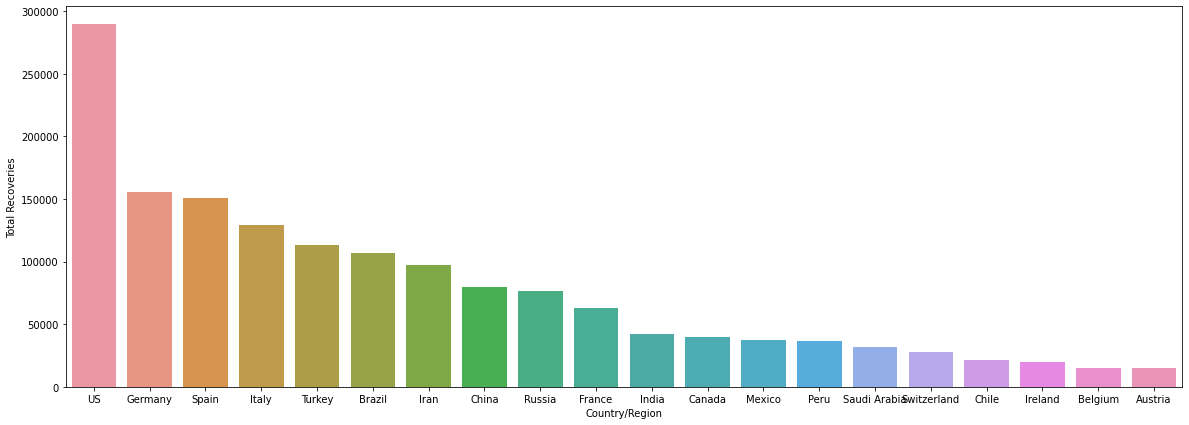

In [0]:
import seaborn as sns
TotalRecoveriesCasesCountrytop20=TotalRecoveriesCasesCountry.head(20)
plt.figure(figsize=(20,7))
sns.barplot(x=TotalRecoveriesCasesCountrytop20.index,y=TotalRecoveriesCasesCountrytop20['Total Recoveries'])
plt.show()

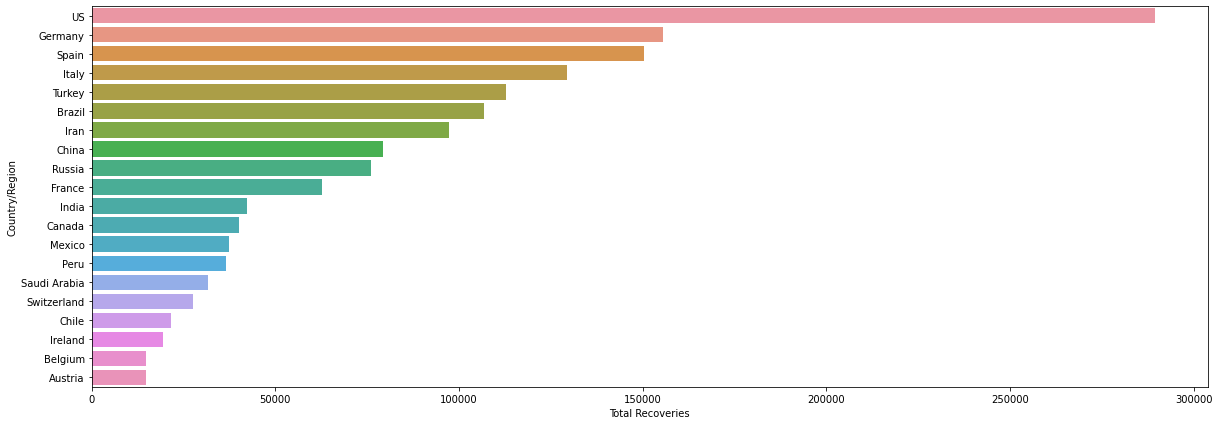

In [0]:
import seaborn as sns
TotalRecoveriesCasesCountrytop20=TotalRecoveriesCasesCountry.head(20)
plt.figure(figsize=(20,7))
sns.barplot(x=TotalRecoveriesCasesCountrytop20['Total Recoveries'],y=TotalRecoveriesCasesCountrytop20.index)
plt.show()

In [0]:
Top10countriesbycasesexclChina

Total Confirmed Cases
Country/Region                       
US                            1528568
Russia                         299941
Brazil                         271885
United Kingdom                 250138
Spain                          232037
Italy                          226699
France                         180933
Germany                        177778
Turkey                         151615
Iran                           124603
India                          106475
Peru                            99483
China                           84063
Canada                          80493
Saudi Arabia                    59854
Belgium                         55791
Mexico                          54346
Chile                           49579
Netherlands                     44449
Pakistan                        43966

In [0]:
TotalCasesCountry

Total Confirmed Cases
Country/Region                         
US                              1528568
Russia                           299941
Brazil                           271885
United Kingdom                   250138
Spain                            232037
...                                 ...
Seychelles                           11
MS Zaandam                            9
Papua New Guinea                      8
Western Sahara                        6
Lesotho                               1

[188 rows x 1 columns]

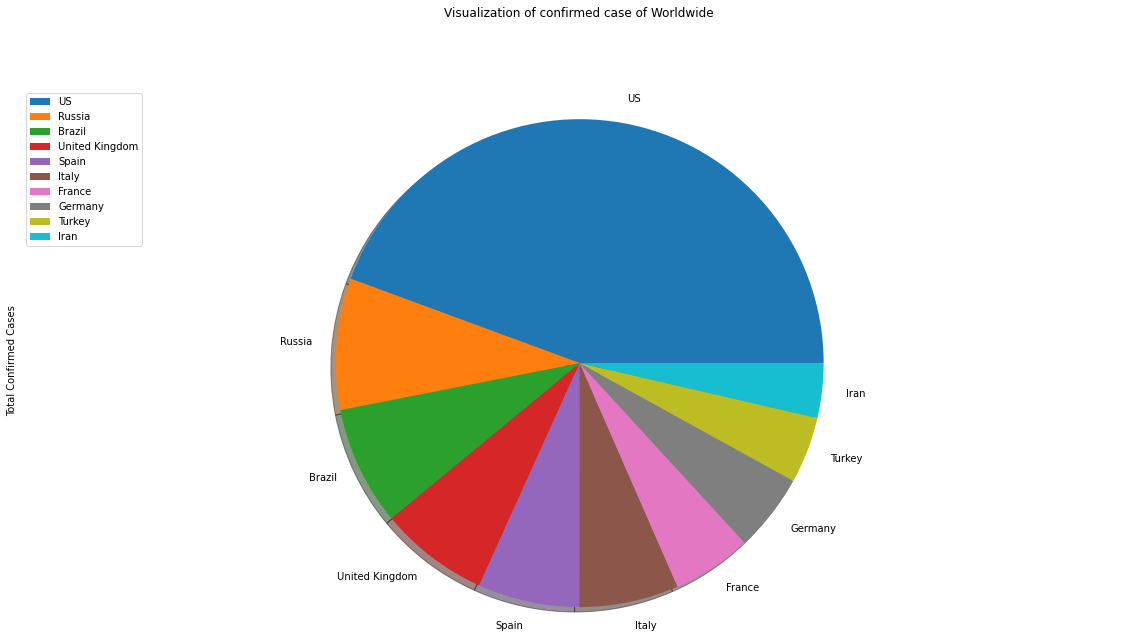

In [0]:
#explode_list = [0.1, 0.1, 0, 0, 0, 0.1, 0.10, 0, 0, 0.1, 0.1,0, 0.1, 0, 0, 0.1, 0.1,0.1, 0, 0, 0, 0.1, 0.1,0,0,0,0.1,0.1,0,0]
u=TotalCasesCountrytop10['Total Confirmed Cases'].plot(x=TotalCasesCountrytop10.index,y='Total Confirmed Cases',figsize=(20,10),title='Visualization of confirmed case of Worldwide',kind='pie' ,pctdistance=1.12,startangle=360,shadow=True )
plt.title('Visualization of confirmed case of Worldwide', y=1.12) 
plt.axis('equal')
plt.legend(labels=TotalCasesCountrytop10.index, loc='upper left')


In [0]:

USFirstCase=CountryConsolidated.loc['US']['Total Confirmed Cases'].reset_index().set_index('Date')
U=USFirstCase.rename(columns={'Total Confirmed Cases':'US Confirmed Case'})
SPFirstCase=CountryConsolidated.loc['Spain']['Total Confirmed Cases'].reset_index().set_index('Date')
S=SPFirstCase.rename(columns={'Total Confirmed Cases':'Spain Confirmed Case'})
ItalyFirstCase=CountryConsolidated.loc['Italy']['Total Confirmed Cases'].reset_index().set_index('Date')
I=ItalyFirstCase.rename(columns={'Total Confirmed Cases':'Italy Confirmed Case'})
UnitedkingdomFirstCase=CountryConsolidated.loc['United Kingdom']['Total Confirmed Cases'].reset_index().set_index('Date')
UK=UnitedkingdomFirstCase.rename(columns={'Total Confirmed Cases':'United Kingdom Confirmed Case'})
SingaporeFirstCase=CountryConsolidated.loc['Singapore']['Total Confirmed Cases'].reset_index().set_index('Date')
Si=SingaporeFirstCase.rename(columns={'Total Confirmed Cases':'Singapore Confirmed Case'})

USGrowth=U[U.ne(0)].dropna().reset_index()
SGrowth=S[S.ne(0)].dropna().reset_index()
IGrowth=I[I.ne(0)].dropna().reset_index()
UKGrowth=UK[UK.ne(0)].dropna().reset_index()
SingaporeGrowth=Si[Si.ne(0)].dropna().reset_index()

In [0]:
USGrowth

Date  US Confirmed Case
0   2020-01-22                  1
1   2020-01-23                  1
2   2020-01-24                  2
3   2020-01-25                  2
4   2020-01-26                  5
..         ...                ...
114 2020-05-15            1442824
115 2020-05-16            1467820
116 2020-05-17            1486757
117 2020-05-18            1508308
118 2020-05-19            1528568

[119 rows x 2 columns]

Text(0, 0.5, 'US Confirmed Cases')

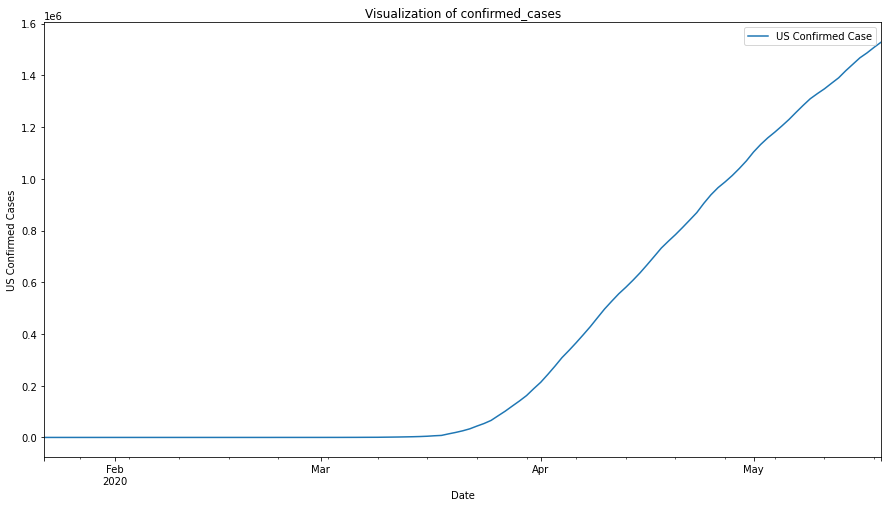

In [0]:
import matplotlib.pyplot as plt
d=USGrowth.plot(x='Date',y='US Confirmed Case',figsize=(15,8),title='Visualization of confirmed_cases')
a='US Confirmed Cases'
d.set_ylabel(a)

In [0]:
SingaporeGrowth

Date  Singapore Confirmed Case
0   2020-01-23                       1.0
1   2020-01-24                       3.0
2   2020-01-25                       3.0
3   2020-01-26                       4.0
4   2020-01-27                       5.0
..         ...                       ...
113 2020-05-15                   26891.0
114 2020-05-16                   27356.0
115 2020-05-17                   28038.0
116 2020-05-18                   28343.0
117 2020-05-19                   28794.0

[118 rows x 2 columns]

In [0]:
fig = make_subplots(rows=2, cols=2,shared_xaxes=True,
                   subplot_titles=('US','Spain','Italy','United Kingdom'))

fig.update_xaxes(title_text="Number of Days since Outbreak", row=2, col=1)

fig.update_xaxes(title_text="Number of Days since Outbreak", row=2, col=2)

fig.add_trace(go.Scatter(x=USGrowth['Date'],y=USGrowth['US Confirmed Case'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=1)
fig.add_trace(go.Scatter(x=SGrowth['Date'],y=SGrowth['Spain Confirmed Case'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=IGrowth['Date'],y=IGrowth['Italy Confirmed Case'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=1)    
                           
fig.add_trace(go.Scatter(x=UKGrowth['Date'],y=UKGrowth['United Kingdom Confirmed Case'],
                         mode='lines+markers',
                         name='Active Cases',
                         line=dict(color=chartcol,width=2)),
                          row=2,col=2)  

fig.update_layout(showlegend=True)

In [0]:
USFirstCase=CountryConsolidated.loc['US'].reset_index()
'''USFirstCase=CountryConsolidated.loc['US','Total Confirmed Cases':'Death to Cases Ratio'].reset_index().set_index('Date')
U=USFirstCase.rename(columns={'Daily New Cases':'US daily new Cases'})
SPFirstCase=CountryConsolidated.loc['Spain']['Daily New Cases'].reset_index().set_index('Date')
S=SPFirstCase.rename(columns={'Daily New Cases':'Spain daily new Cases'})
ItalyFirstCase=CountryConsolidated.loc['Italy']['Daily New Cases'].reset_index().set_index('Date')
I=ItalyFirstCase.rename(columns={'Daily New Cases':'Italy daily new Cases'})
UnitedkingdomFirstCase=CountryConsolidated.loc['United Kingdom']['Daily New Cases'].reset_index().set_index('Date')
UK=UnitedkingdomFirstCase.rename(columns={'Daily New Cases':'United Kingdom daily new Cases'})
#SingaporeFirstCase=CountryConsolidated.loc['Singapore']['Total Confirmed Cases'].reset_index().set_index('Date')
#Si=SingaporeFirstCase.rename(columns={'Total Confirmed Cases':'Singapore Confirmed Case'})

USGrowth=U[U.ne(0)].dropna().reset_index()
SGrowth=S[S.ne(0)].dropna().reset_index()
IGrowth=I[I.ne(0)].dropna().reset_index()
UKGrowth=UK[UK.ne(0)].dropna().reset_index()
#SingaporeGrowth=Si[Si.ne(0)].dropna().reset_index()'''

"USFirstCase=CountryConsolidated.loc['US','Total Confirmed Cases':'Death to Cases Ratio'].reset_index().set_index('Date')\nU=USFirstCase.rename(columns={'Daily New Cases':'US daily new Cases'})\nSPFirstCase=CountryConsolidated.loc['Spain']['Daily New Cases'].reset_index().set_index('Date')\nS=SPFirstCase.rename(columns={'Daily New Cases':'Spain daily new Cases'})\nItalyFirstCase=CountryConsolidated.loc['Italy']['Daily New Cases'].reset_index().set_index('Date')\nI=ItalyFirstCase.rename(columns={'Daily New Cases':'Italy daily new Cases'})\nUnitedkingdomFirstCase=CountryConsolidated.loc['United Kingdom']['Daily New Cases'].reset_index().set_index('Date')\nUK=UnitedkingdomFirstCase.rename(columns={'Daily New Cases':'United Kingdom daily new Cases'})\n#SingaporeFirstCase=CountryConsolidated.loc['Singapore']['Total Confirmed Cases'].reset_index().set_index('Date')\n#Si=SingaporeFirstCase.rename(columns={'Total Confirmed Cases':'Singapore Confirmed Case'})\n\nUSGrowth=U[U.ne(0)].dropna().res

In [0]:
USFirstCase

Date  ...  Death to Cases Ratio
0   2020-01-22  ...                 0.000
1   2020-01-23  ...                 0.000
2   2020-01-24  ...                 0.000
3   2020-01-25  ...                 0.000
4   2020-01-26  ...                 0.000
..         ...  ...                   ...
114 2020-05-15  ...                 0.061
115 2020-05-16  ...                 0.060
116 2020-05-17  ...                 0.060
117 2020-05-18  ...                 0.060
118 2020-05-19  ...                 0.060

[119 rows x 10 columns]

In [0]:
import requests
r = requests.get('https://api.covid19api.com/dayone/country/india')
#2916b1cfc52248f68b5ff5d01140b962
print(r)
#return r.text

<Response [200]>


In [0]:
import json
import datetime
jsondata=json.loads(r.text)
import pandas as pd
df=pd.DataFrame(jsondata)
#df=df.drop(['0'])
df=df.drop([len(df['Date'])-1])#to drop the dummy last rrow of the dataframe
df['Date']=pd.to_datetime(df['Date'])#yto convert date of object type into date-time type
df['Date']=df['Date'].dt.date#to convert date-timee to date in a dataframe
#df=df.drop(['Country','CountryCode','Province'	,'City'	,'CityCode',	'Lat',	'Lon'],axis=1)
df['Active']=df['Confirmed']-df['Deaths']-df['Recovered']
df

Country CountryCode Province City  ... Deaths Recovered Active        Date
0     India          IN                ...      0         0      1  2020-01-30
1     India          IN                ...      0         0      1  2020-01-31
2     India          IN                ...      0         0      1  2020-02-01
3     India          IN                ...      0         0      2  2020-02-02
4     India          IN                ...      0         0      3  2020-02-03
..      ...         ...      ...  ...  ...    ...       ...    ...         ...
96    India          IN                ...   1693     14142  33565  2020-05-05
97    India          IN                ...   1785     15331  35871  2020-05-06
98    India          IN                ...   1889     16776  37686  2020-05-07
99    India          IN                ...   1985     17887  39823  2020-05-08
100   India          IN                ...   2101     19301  41406  2020-05-09

[101 rows x 12 columns]

In [0]:
import matplotlib.pyplot as plt
d=df.plot(x='Date',y='Confirmed',figsize=(15,8),title='Visualization of confirmed_cases')
a='Confirmed Cases'
d.set_ylabel(a)

KeyError: ignored

In [0]:
df=CountryConsolidated
#df = cf.datagen.lines()
fig = df.iplot(asFigure=True,mode='lines+markers+text',
    #text=text,
    y='Total Confirmed Cases',
    opacity=0.9,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Total Confirmed Cases by Date')
fig.show()

In [0]:
c1=CountryConsolidated.loc['India']
c1

Total Confirmed Cases  ...  Death to Cases Ratio
Date                               ...                      
2020-01-22                      0  ...                   NaN
2020-01-23                      0  ...                   NaN
2020-01-24                      0  ...                   NaN
2020-01-25                      0  ...                   NaN
2020-01-26                      0  ...                   NaN
...                           ...  ...                   ...
2020-05-08                  59695  ...                 0.033
2020-05-09                  62808  ...                 0.033
2020-05-10                  67161  ...                 0.033
2020-05-11                  70768  ...                 0.032
2020-05-12                  74292  ...                 0.033

[112 rows x 9 columns]

In [0]:

fig=c1.iplot(
    asFigure=True,
    mode='markers',
    #text=text,
    y=['Total Confirmed Cases','Daily New Cases','Total Deaths',	'Daily New Deaths',	'Total Recoveries',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    yTitle='Total Confirmed Cases',
    title='Visualization of Corona virus spread by Date of India'
    )
fig.show()

In [0]:
fig=c1.iplot(
    asFigure=True,
      subplots=True, 
    subplot_titles=True, 
    legend=False,
    #kind='bar',
    #mode='lines+text',
    #text=text,
    y=['Daily New Cases',	'Daily New Deaths',	'Daily New Recoveries',	'Active Cases'],
    opacity=0.8,
    xTitle='Date',
    shape=(5,1), shared_xaxes=True, fill=True,
    title='Visualization of Corona Virus Spread by Date of India'
    )
fig.show()

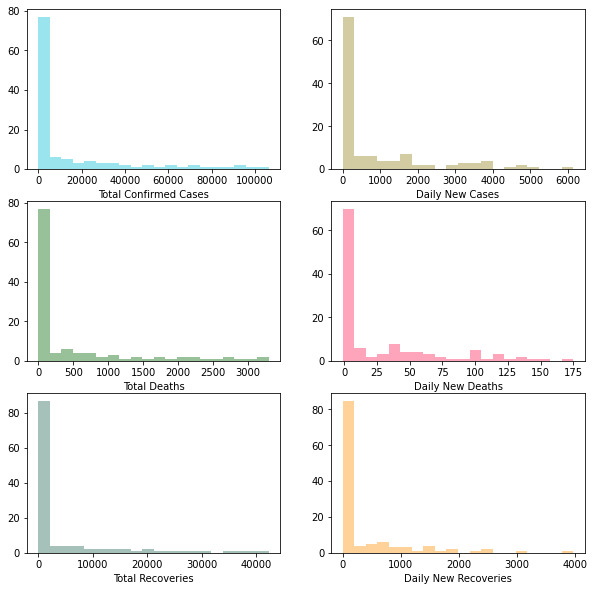

In [0]:
import seaborn as sns
fig1,axes=plt.subplots(nrows=3,ncols=2,figsize=(10,10))
sns.distplot(In['Total Confirmed Cases'],color='#00bcd4',ax=axes[0,0],kde=False,bins=20)
sns.distplot(In['Daily New Cases'],color='#937d14',ax=axes[0,1],kde=False,bins=20)
sns.distplot(In['Total Deaths'],color='#006600',ax=axes[1,0],kde=False,bins=20)
sns.distplot(In['Daily New Deaths'],color='#ff1e56',ax=axes[1,1],kde=False,bins=20)
sns.distplot(In['Total Recoveries'],color='#216353',ax=axes[2,0],kde=False,bins=20)
sns.distplot(In['Daily New Recoveries'],color='#FF8F00',ax=axes[2,1],kde=False,bins=20)
#sns.distplot(In[''],color='#33FF00',ax=axes=[2,0],kde=False,bins=20)
#sns.distplot(In[''],color='#FF3300',ax=axes=[2,1],kde=False,bins=20)
#sns.distplot(In[''],color='#CCCC00',ax=axes=[2,2],kde=False,bins=20)
plt.show()

In [0]:
fig = go.Figure(data=[
    go.Bar(name='Daily New Deaths', x=In.index, y=In['Daily New Deaths'],marker_color='crimson',marker_line_color='black'),
    go.Bar(name='Daily New Recoveries', x=In.index, y=In['Daily New Recoveries'],marker_color='limegreen',marker_line_color='black'),
    go.Bar(name='Daily New Cases', x=In.index, y=In['Daily New Cases'],marker_color='royalblue',marker_line_color='black'),
])
# Change the bar mode
fig.update_layout(template="simple_white",barmode='relative', title='Total Cases, Deaths & Recoveries',
                 annotations=[dict(x='2020-03-23', y=103, xref="x", yref="y", text="First Lockdown(23rd March)", showarrow=True, arrowhead=1, ax=-100, ay=-100),
                              dict(x='2020-04-15', y=835, xref="x", yref="y", text="Second Lockdown(15th April)", showarrow=True, arrowhead=1, ax=-100, ay=-100),
                              dict(x='2020-05-04', y=3932, xref="x", yref="y", text="Third Lockdown(4th May)", showarrow=True, arrowhead=1, ax=-100, ay=-100),
                              dict(x='2020-05-17', y=3932, xref="x", yref="y", text="Fourth Lockdown(17th May)", showarrow=True, arrowhead=1, ax=-50, ay=-50)])
                              
fig.show()

In [0]:
%%HTML
<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2061549" data-url="https://flo.uri.sh/visualisation/2061549/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>


https://plotly.com/python/cufflinks/

In [0]:
I=CountryConsolidated.loc['India']['Total Confirmed Cases'].reset_index().set_index('Date')
#U=USFirstCase.rename(columns={'Total Confirmed Cases':'US Confirmed Case'})
P=CountryConsolidated.loc['Pakistan']['Total Confirmed Cases'].reset_index().set_index('Date')
#S=SPFirstCase.rename(columns={'Total Confirmed Cases':'Spain Confirmed Case'})
N=CountryConsolidated.loc['Nepal']['Total Confirmed Cases'].reset_index().set_index('Date')
#I=ItalyFirstCase.rename(columns={'Total Confirmed Cases':'Italy Confirmed Case'})
Bh=CountryConsolidated.loc['Bhutan']['Total Confirmed Cases'].reset_index().set_index('Date')
#UK=UnitedkingdomFirstCase.rename(columns={'Total Confirmed Cases':'United Kingdom Confirmed Case'})
Ba=CountryConsolidated.loc['Bangladesh']['Total Confirmed Cases'].reset_index().set_index('Date')
#Si=SingaporeFirstCase.rename(columns={'Total Confirmed Cases':'Singapore Confirmed Case'})
#Sr=CountryConsolidated.loc['Srilanka']['Total Confirmed Cases'].reset_index().set_index('Date')
C=CountryConsolidated.loc['China']['Total Confirmed Cases'].reset_index().set_index('Date')


I1=I[I.ne(0)].dropna().reset_index()
P1=P[P.ne(0)].dropna().reset_index()
N1=N[N.ne(0)].dropna().reset_index()
Bh1=Bh[Bh.ne(0)].dropna().reset_index()
Ba1=Ba[Ba.ne(0)].dropna().reset_index()
#Sr1=Sr[Sr.ne(0)].dropna().reset_index()
C1=C[C.ne(0)].dropna().reset_index()


In [0]:
fig = make_subplots(rows=3, cols=2,shared_xaxes=True,
                   subplot_titles=('India','Pakistan','Bangladesh','Nepal','Bhutan','China'))

fig.add_trace(go.Scatter(x=I1['Date'],y=I1['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='India Total Confirmed Cases',
                          row=1,col=1)
fig.add_trace(go.Scatter(x=P1['Date'],y=P1['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Pakistan Total Confirmed Cases',
                          row=1,col=2)
                           
fig.add_trace(go.Scatter(x=Ba1['Date'],y=Ba1['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                          row=2,col=1)    
                           
fig.add_trace(go.Scatter(x=N1['Date'],y=N1['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                          row=2,col=2)
  
fig.add_trace(go.Scatter(x=Bh1['Date'],y=Bh1['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases',
                          row=3,col=1)

fig.add_trace(go.Scatter(x=C1['Date'],y=C1['Total Confirmed Cases'],
                         mode='lines+markers',
                         name='Total Confirmed Cases', 
                          row=3,col=2)
fig.update_layout(template='plotly_white',showlegend=False,title='bmn')

SyntaxError: ignored

In [0]:
CountryConsolidated.reset_index().set_index('Country/Region')

Date  ...  Death to Cases Ratio
Country/Region             ...                      
Afghanistan    2020-01-22  ...                   NaN
Afghanistan    2020-01-23  ...                   NaN
Afghanistan    2020-01-24  ...                   NaN
Afghanistan    2020-01-25  ...                   NaN
Afghanistan    2020-01-26  ...                   NaN
...                   ...  ...                   ...
Zimbabwe       2020-05-07  ...                 0.118
Zimbabwe       2020-05-08  ...                 0.118
Zimbabwe       2020-05-09  ...                 0.114
Zimbabwe       2020-05-10  ...                 0.111
Zimbabwe       2020-05-11  ...                 0.111

[20757 rows x 10 columns]

In [0]:
GlobalTotals=CountryConsolidated.reset_index().groupby('Date').sum()
GlobalTotals.columns

Index(['Total Confirmed Cases', 'Daily New Cases', 'Total Deaths',
       'Daily New Deaths', 'Total Recoveries', 'Daily New Recoveries',
       'Active Cases', 'Share of Recoveries - Closed Cases',
       'Death to Cases Ratio'],
      dtype='object')

In [0]:

fig = go.Figure()
fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Total Confirmed Cases']))
#fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Daily New Cases']))
fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Total Deaths']))
#fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Daily New Deaths']))
fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Total Recoveries']))
#fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Daily New Recoveries']))
#fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Share of Recoveries - Closed Cases']))
#fig.add_trace(go.Bar(x=GlobalTotals.index, y=GlobalTotals['Death to Cases Ratio']))



fig.update_layout(barmode='relative', title_text='Relative Barmode')
fig.show()

In [0]:
pip install pygooglechart==0.4.0


  Created wheel for pygooglechart: filename=pygooglechart-0.4.0-cp36-none-any.whl size=21996 sha256=f31d63981124e942f51dc736137ca5f0196bbd79101d875cda21735f55c672d4
  Stored in directory: /root/.cache/pip/wheels/3d/49/3a/b6b674613fefd1b8939e0bb368028230f0463455bb75d4e590
Successfully built pygooglechart


In [0]:
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = GlobalTotals['Recovered']
categories = GlobalTotals['Country/Region']
explode = list(np.zeros(len(data)))
listed = list(sorted(data))[-3:]
explode[list(data).index(listed[0])] = 0.1
explode[list(data).index(listed[1])] = 0.05
explode[list(data).index(listed[2])] = 0.1

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)
wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.tab20b.colors,
                                 startangle=140,
                                 explode = explode)

# Decoration
ax.legend(wedges, categories, title="Countries/Regions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Pie Diagram of Recoveries by CoronaVirus")
plt.show()